In [1]:
from SupertypeTools import CalcMat, CGCalcMat, heatmap, Matrix2Dendro, DBSCAN_cluster, StatDist, hierarchical_cluster
import numpy as np
import pandas as pd
import os
from pymol import cmd

import seaborn as sns
import matplotlib.pyplot as plt

contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171]
weight = {5:[7,9,24,45,62,63,66,67,70,74,77,80,81,84,95,97,99,116,118,143,147,159]}

### === Figure 1: rmsd between crystal structure and mean crystal structure ===

In [3]:
def FA_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    FA_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):

            cmd.load(f"{InDir}/{InPDB}", "target")

            FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0] # full-atom RMSD

            FA_RMSD_list.append(FA_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return FA_RMSD_list

def BB_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    BB_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):

            cmd.load(f"{InDir}/{InPDB}", "target")

            BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0] # backbone RMSD

            BB_RMSD_list.append(BB_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return BB_RMSD_list

def hm_RMSD(InPDB, refPDB):
    cmd.load(refPDB, "template")
    cmd.load(InPDB, "target")

    BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0]
    FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0]

    cmd.delete("target")
    cmd.delete("template")

    return BB_RMSD, FA_RMSD

A_list = ["A01_01", "A02_01", "A02_06", "A03_01", "A11_01", "A23_01", "A24_02", "A30_03", "A68_01"]
B_list = ["B07_02", "B08_01", "B14_02", "B15_01", "B18_01", "B27_03", "B27_05", "B27_09", "B35_01",
     "B37_01", "B39_01", "B42_01", "B44_02", "B44_03", "B51_01", "B53_01", "B57_01", "B58_01"]

BB_full = []
FA_full = []

model_BB_full = []
model_FA_full = []

for allele in A_list:
    FA_RMSD_list = FA_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/A_mean/PDB/{allele}.pdb")
    BB_RMSD_list = BB_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/A_mean/PDB/{allele}.pdb")
    model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAA_relax/ALIGN/{allele}.pdb", f"../crystal/A_mean/PDB/{allele}.pdb")
    BB_full.extend(BB_RMSD_list)
    FA_full.extend(FA_RMSD_list)
    model_BB_full.append(model_BB_RMSD)
    model_FA_full.append(model_FA_RMSD)

for allele in B_list:
    FA_RMSD_list = FA_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/B_mean/PDB/{allele}.pdb")
    BB_RMSD_list = BB_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/B_mean/PDB/{allele}.pdb")
    model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAB_relax/ALIGN/{allele}.pdb", f"../crystal/B_mean/PDB/{allele}.pdb")
    BB_full.extend(BB_RMSD_list)
    FA_full.extend(FA_RMSD_list)
    model_BB_full.append(model_BB_RMSD)
    model_FA_full.append(model_FA_RMSD)

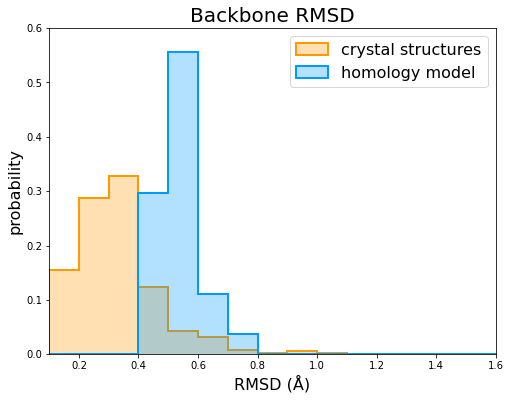

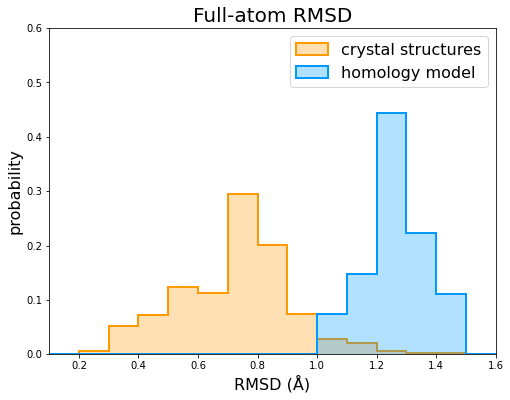

In [93]:
weights1 = np.ones_like(BB_full)/float(len(BB_full))
weights2 = np.ones_like(model_BB_full)/float(len(model_BB_full))

plt.figure(figsize=(8,6))
plt.xlim((0.1, 1.6))
plt.ylim((0, 0.6))
plt.hist(BB_full, weights=weights1, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(model_BB_full, weights=weights2, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
plt.title("Backbone RMSD", fontsize=20)
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(FA_full, weights=weights1, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(model_FA_full, weights=weights2, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_FA_full, density=True, facecolor='b', alpha=0.75)
plt.title("Full-atom RMSD", fontsize=20)
plt.xlim((0.1, 1.6))
plt.ylim((0, 0.6))
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.show()
# print(BB_RMSD_list_full, RMSD_list_full)

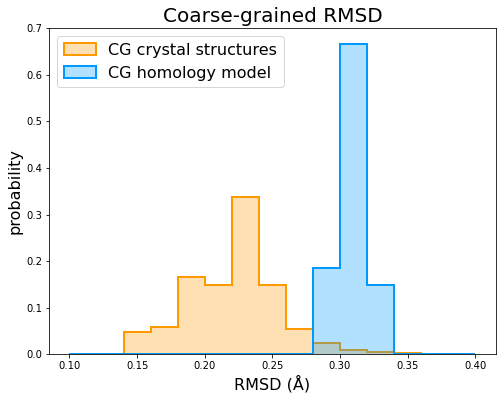

In [6]:
from CGmodel import CG_RMSD
A_list = ["A01_01", "A02_01", "A02_06", "A03_01", "A11_01", "A23_01", "A24_02", "A30_03", "A68_01"]
B_list = ["B07_02", "B08_01", "B14_02", "B15_01", "B18_01", "B27_03", "B27_05", "B27_09", "B35_01",
     "B37_01", "B39_01", "B42_01", "B44_02", "B44_03", "B51_01", "B53_01", "B57_01", "B58_01"]

CG_RMSD_list = []
CG_model_RMSD_list = []

for allele in A_list:
    # crystal structure
    for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG/{allele}"):
        if InDAT.endswith(".csv"):
            # print(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}")
            CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}", f"../crystal/A_mean/CG_DAT/{allele}_CG.csv"))

    # homology model
    CG_model_RMSD_list.append(CG_RMSD(f"../HLAA_relax/CG_DAT/{allele}_CG.csv", f"../crystal/A_mean/CG_DAT/{allele}_CG.csv"))

for allele in B_list:
    for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG/{allele}"):
        if InDAT.endswith(".csv"):
            # print(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}")
            CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}", f"../crystal/B_mean/CG_DAT/{allele}_CG.csv"))

    CG_model_RMSD_list.append(CG_RMSD(f"../HLAB_relax/CG_DAT/{allele}_CG.csv", f"../crystal/B_mean/CG_DAT/{allele}_CG.csv"))

weights1 = np.ones_like(CG_RMSD_list)/float(len(CG_RMSD_list))
weights2 = np.ones_like(CG_model_RMSD_list)/float(len(CG_model_RMSD_list))

plt.figure(figsize=(8,6))
# plt.xlim((0.1, 1.6))
# plt.ylim((0, 0.6))
plt.hist(CG_RMSD_list, weights=weights1, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="CG crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(CG_model_RMSD_list, weights=weights2, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="CG homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
plt.title("Coarse-grained RMSD", fontsize=20)
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16, loc="upper left")
plt.show()

### === Figure 2: clustering of homology model, representive crystal structure, and mean crystal structure ===

#### crystal, full atom

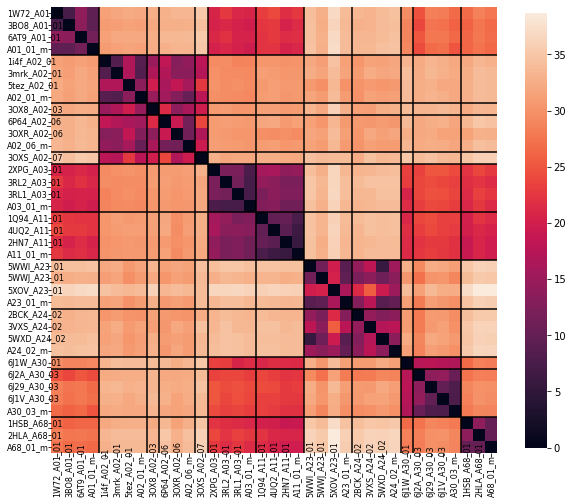

In [2]:
fig2A_cr_order = [
    ['1W72_A01_01','3BO8_A01_01','6AT9_A01_01','A01_01_m'],
    ['1i4f_A02_01','3mrk_A02_01','5tez_A02_01','A02_01_m'],
    ['3OX8_A02_03'],
    ['6P64_A02_06','3OXR_A02_06','A02_06_m'],
    ['3OXS_A02_07'],
    ['2XPG_A03_01','3RL2_A03_01','3RL1_A03_01','A03_01_m'],
    ['1Q94_A11_01','4UQ2_A11_01','2HN7_A11_01','A11_01_m'],
    ['5WWI_A23_01','5WWJ_A23_01','5XOV_A23_01','A23_01_m'],
    ['2BCK_A24_02','3VXS_A24_02','5WXD_A24_02','A24_02_m'],
    ['6J1W_A30_01'],
    ['6J2A_A30_03','6J29_A30_03','6J1V_A30_03','A30_03_m'],
    ['1HSB_A68_01','2HLA_A68_01','A68_01_m']
]
Mat = CalcMat("../Figures/Figure2_clustering_cr_hm/HLA-A/cr/DAT", None, contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=fig2A_cr_order, line=True)
Matrix2Dendro(Mat, "HLA-A_cr_fa.newick")

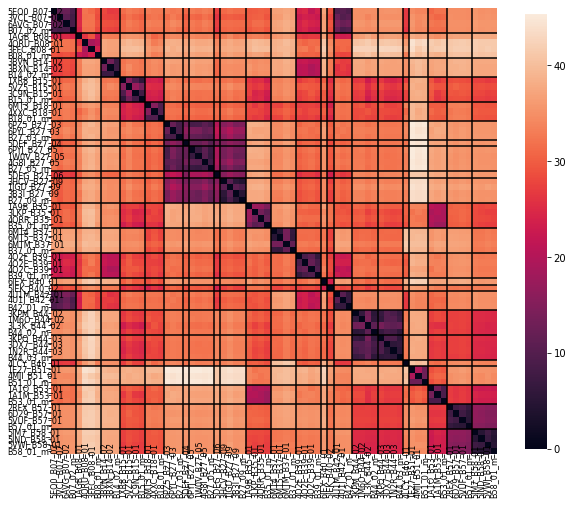

In [5]:
fig2B_cr_order = [
    ['5EO0_B07_02','3VCL_B07_02','6AVG_B07_02','B07_02_m'],
    ['1AGB_B08_01','4QRU_B08_01','3FFC_B08_01','B08_01_m'],
    ['3BVN_B14_02','3BXN_B14_02','B14_02_m'],
    ['1XR8_B15_01','5VZ5_B15_01','3C9N_B15_01','B15_01_m'],
    ['6MT3_B18_01','4XXC_B18_01','B18_01_m'],
    ['6PZ5_B27_03','6PYL_B27_03','B27_03_m'],
    ['5DEF_B27_04'],
    ['6PYJ_B27_05','1W0V_B27_05','4G8I_B27_05','B27_05_m'],
    ['5DEG_B27_06'],
    ['3HCV_B27_09','1JGD_B27_09','3B3I_B27_09','B27_09_m'],
    ['1A9B_B35_01','3LKP_B35_01','4QRR_B35_01','B35_01_m'],
    ['6MT4_B37_01','6MT5_B37_01','6MTM_B37_01','B37_01_m'],
    ['4O2F_B39_01','4O2E_B39_01','4O2C_B39_01','B39_01_m'],
    ['6IEX_B40_01'],
    ['5IEK_B40_02'],
    ['4U1M_B42_01','4U1J_B42_01','B42_01_m'],
    ['3KPM_B44_02','1M6O_B44_02','3L3K_B44_02','B44_02_m'],
    ['3KPO_B44_03','3DX7_B44_03','1N2R_B44_03','B44_03_m'],
    ['4LCY_B46_01'],
    ['1E27_B51_01','4MJI_B51_01','B51_01_m'],
    ['1A1O_B53_01','1A1M_B53_01','B53_01_m'],
    ['2RFX_B57_01','6D29_B57_01','5VUF_B57_01','B57_01_m'],
    ['5IM7_B58_01','5IND_B58_01','5VWJ_B58_01','B58_01_m']
]
Mat = CalcMat("../Figures/Figure2_clustering_cr_hm/HLA-B/cr/DAT", None, contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=fig2B_cr_order, line=True)
Matrix2Dendro(Mat, "HLA-B_cr_fa.newick")

#### model, full atom

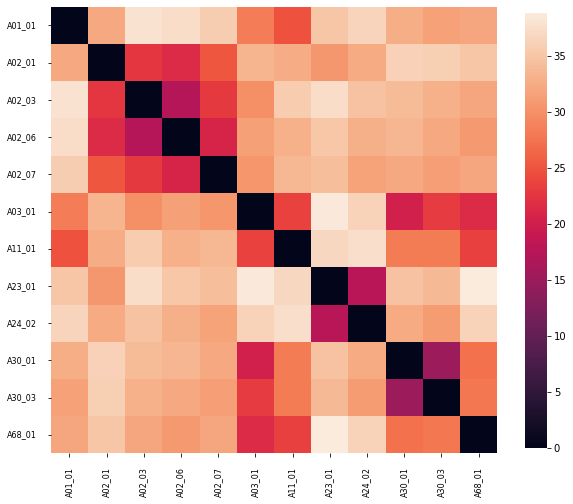

In [4]:
fig2A_hm_order = ['A01_01','A02_01','A02_03','A02_06','A02_07','A03_01','A11_01','A23_01','A24_02','A30_01','A30_03','A68_01']
Mat = CalcMat("../Figures/Figure2_clustering_cr_hm/HLA-A/hm/DAT", None, contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=fig2A_hm_order, line=False)
Matrix2Dendro(Mat, "HLA-A_hm_fa.newick")

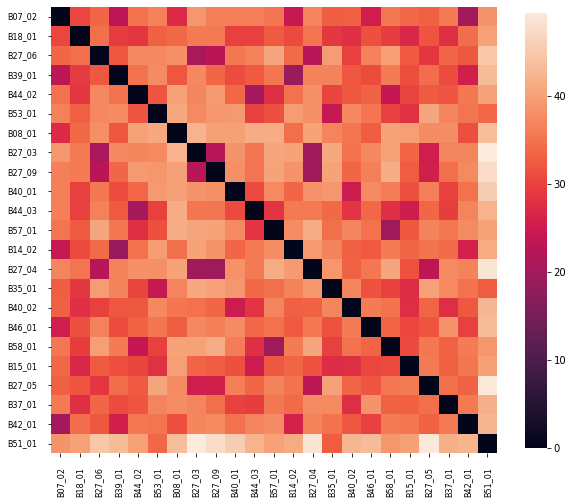

In [8]:
fig2B_hm_order = ['B07_02','B18_01','B27_06','B39_01','B44_02','B53_01','B08_01','B27_03','B27_09','B40_01','B44_03',
    'B57_01','B14_02','B27_04','B35_01','B40_02','B46_01','B58_01','B15_01','B27_05','B37_01','B42_01','B51_01']
Mat = CalcMat("../Figures/Figure2_clustering_cr_hm/HLA-B/hm/DAT", None, contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=fig2B_hm_order, line=False)
Matrix2Dendro(Mat, "HLA-B_hm_fa.newick")

### === Figure 3: clustering of reference panel (homology model and mean crystal structure), comping to existing supertypes ===

#### Full atom

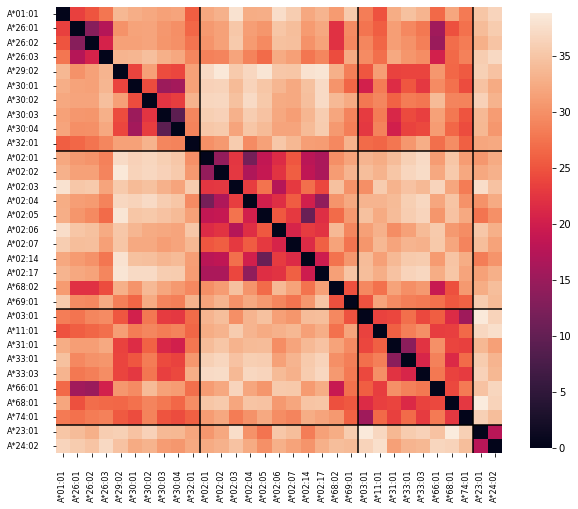

In [3]:
# A_order = [
#     ['A01_01_hm', 'A01_01_cr', 'A26_01_hm', 'A26_02_hm', 'A26_03_hm', 'A29_02_hm', 'A30_01_hm', 'A30_01_cr', 'A30_02_hm', 'A30_03_hm', 'A30_03_cr', 'A30_04_hm', 'A32_01_hm'],
#     ['A02_01_hm', 'A02_01_cr', 'A02_02_hm', 'A02_03_hm', 'A02_03_cr', 'A02_04_hm', 'A02_05_hm', 'A02_06_hm', 'A02_06_cr', 'A02_07_hm', 'A02_07_cr', 'A02_14_hm', 'A02_17_hm', 'A68_02_hm', 'A69_01_hm'],
#     ['A03_01_hm', 'A03_01_cr', 'A11_01_hm', 'A11_01_cr', 'A31_01_hm', 'A33_01_hm', 'A33_03_hm', 'A66_01_hm', 'A68_01_hm', 'A68_01_cr', 'A74_01_hm'],
#     ['A23_01_hm', 'A23_01_cr', 'A24_02_hm', 'A24_02_cr']
# ]

# A_label = [
#     'A*01:01','A*01:01_c','A*26:01','A*26:02','A*26:03','A*29:02','A*30:01','A*30:01_c','A*30:02','A*30:03','A*30:03_c','A*30:04','A*32:01',
#     'A*02:01','A*02:01_c','A*02:02','A*02:03','A*02:03_c','A*02:04','A*02:05','A*02:06','A*02:06_c','A*02:07','A*02:07_c','A*02:14','A*02:17','A*68:02','A*69:01',
#     'A*03:01','A*03:01_c','A*11:01','A*11:01_c','A*31:01','A*33:01','A*33:03','A*66:01','A*68:01','A*68:01_c','A*74:01',
#     'A*23:01','A*23:01_c','A*24:02','A*24:02_c'
# ]
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
A_label = ['A*01:01', 'A*26:01', 'A*26:02', 'A*26:03', 'A*29:02', 'A*30:01', 'A*30:02', 'A*30:03', 'A*30:04', 'A*32:01', 'A*02:01', 'A*02:02', 'A*02:03', 'A*02:04', 'A*02:05', 'A*02:06', 'A*02:07', 'A*02:14', 'A*02:17', 'A*68:02', 'A*69:01', 'A*03:01', 'A*11:01', 'A*31:01', 'A*33:01', 'A*33:03', 'A*66:01', 'A*68:01', 'A*74:01', 'A*23:01', 'A*24:02']
# A_order = ['A01_01','A02_01','A02_02','A02_03','A02_04','A02_05','A02_06','A02_07','A02_14','A02_17','A03_01','A11_01','A23_01','A24_02','A26_01','A26_02','A26_03','A29_02','A30_01','A30_02','A30_03','A30_04','A31_01','A32_01','A33_01','A33_03','A66_01','A68_01','A68_02','A69_01','A74_01']
# A_label = ['A*01:01','A*02:01','A*02:02','A*02:03','A*02:04','A*02:05','A*02:06','A*02:07','A*02:14','A*02:17','A*03:01','A*11:01','A*23:01','A*24:02','A*26:01','A*26:02','A*26:03','A*29:02','A*30:01','A*30:02','A*30:03','A*30:04','A*31:01','A*32:01','A*33:01','A*33:03','A*66:01','A*68:01','A*68:02','A*69:01','A*74:01']

Mat = CalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-A/DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", contact=contact, weight=weight)
heatmap(Mat, A_order, label=A_label, line=True)
# Matrix2Dendro(Mat, "HLA-A_fa.newick")

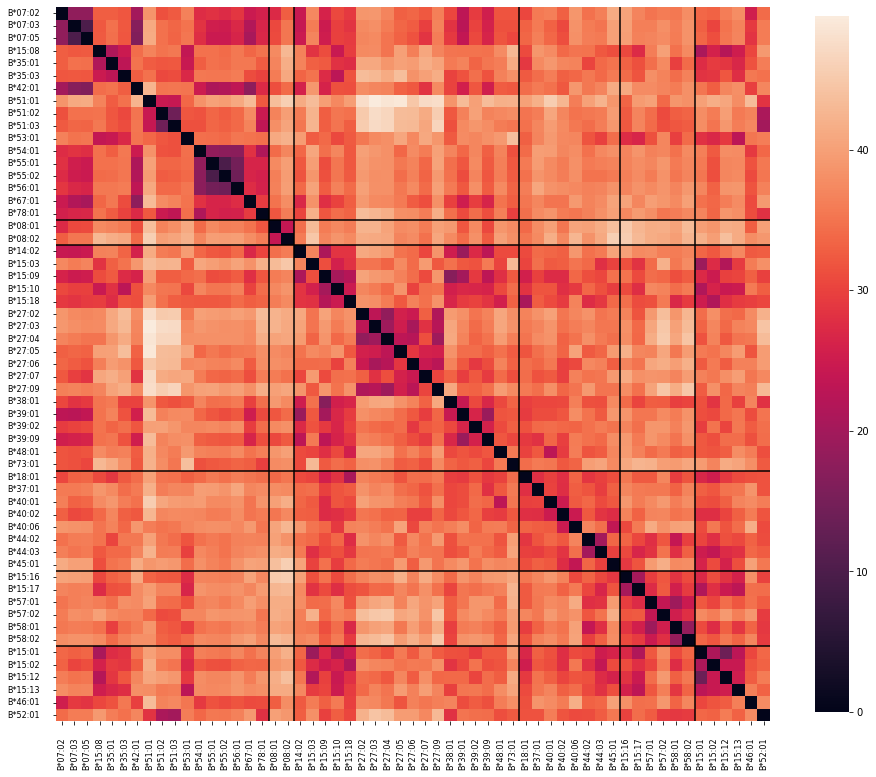

In [4]:
# B_order = [
#     ['B07_02_hm','B07_02_cr','B07_03_hm','B07_05_hm','B15_08_hm','B35_01_hm','B35_01_cr','B35_03_hm','B42_01_hm','B42_01_cr','B51_01_hm','B51_01_cr','B51_02_hm','B51_03_hm','B53_01_hm','B53_01_cr','B54_01_hm','B55_01_hm','B55_02_hm','B56_01_hm','B67_01_hm','B78_01_hm'],
#     ['B08_01_hm','B08_01_cr','B08_02_hm'],
#     ['B14_02_hm','B14_02_cr','B15_03_hm','B15_09_hm','B15_10_hm','B15_18_hm','B27_02_hm','B27_03_hm','B27_03_cr','B27_04_hm','B27_04_cr','B27_05_hm','B27_05_cr','B27_06_hm','B27_06_cr','B27_07_hm','B27_09_hm','B27_09_cr','B38_01_hm','B39_01_hm','B39_01_cr','B39_02_hm','B39_09_hm','B48_01_hm','B73_01_hm'],
#     ['B18_01_hm','B18_01_cr','B37_01_hm','B37_01_cr','B40_01_hm','B40_01_cr','B40_02_hm','B40_02_cr','B40_06_hm','B44_02_hm','B44_02_cr','B44_03_hm','B44_03_cr','B45_01_hm'],
#     ['B15_16_hm','B15_17_hm','B57_01_hm','B57_01_cr','B57_02_hm','B58_01_hm','B58_01_cr','B58_02_hm'],
#     ['B15_01_hm','B15_01_cr','B15_02_hm','B15_12_hm','B15_13_hm','B46_01_hm','B46_01_cr','B52_01_hm']
#     ]

# B_label=[
#     'B*07:02','B*07:02_c','B*07:03','B*07:05','B*15:08','B*35:01','B*35:01_c','B*35:03','B*42:01','B*42:01_c','B*51:01','B*51:01_c','B*51:02','B*51:03','B*53:01','B*53:01_c','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01',
#     'B*08:01','B*08:01_c','B*08:02',
#     'B*14:02','B*14:02_c','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:03_c','B*27:04','B*27:04_c','B*27:05','B*27:05_c','B*27:06','B*27:06_c','B*27:07','B*27:09','B*27:09_c','B*38:01','B*39:01','B*39:01_c','B*39:02','B*39:09','B*48:01','B*73:01',
#     'B*18:01','B*18:01_c','B*37:01','B*37:01_c','B*40:01','B*40:01_c','B*40:02','B*40:02_c','B*40:06','B*44:02','B*44:02_c','B*44:03','B*44:03_c','B*45:01',
#     'B*15:16','B*15:17','B*57:01','B*57:01_c','B*57:02','B*58:01','B*58:01_c','B*58:02',
#     'B*15:01','B*15:01_c','B*15:02','B*15:12','B*15:13','B*46:01','B*46:01_c','B*52:01'
# ]

B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
B_label = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03','B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']
Mat = CalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-B/DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", contact=contact, weight=weight)
heatmap(Mat, B_order, size=(16,16), label=B_label, line=True)
# Matrix2Dendro(Mat, "HLA-B_fa.newick")

#### Coarse grained

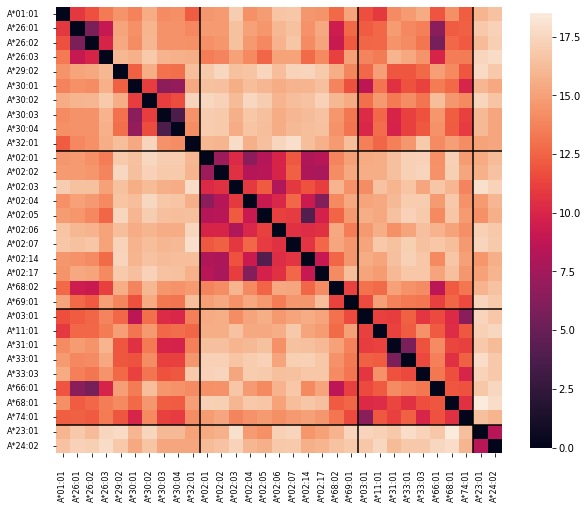

In [6]:
# A_CG_order = [
#     ['A01_01_hm_CG', 'A01_01_cr_CG', 'A26_01_hm_CG', 'A26_02_hm_CG', 'A26_03_hm_CG', 'A29_02_hm_CG', 'A30_01_hm_CG', 'A30_01_cr_CG', 'A30_02_hm_CG', 'A30_03_hm_CG', 'A30_03_cr_CG', 'A30_04_hm_CG', 'A32_01_hm_CG'],
#     ['A02_01_hm_CG', 'A02_01_cr_CG', 'A02_02_hm_CG', 'A02_03_hm_CG', 'A02_03_cr_CG', 'A02_04_hm_CG', 'A02_05_hm_CG', 'A02_06_hm_CG', 'A02_06_cr_CG', 'A02_07_hm_CG', 'A02_07_cr_CG', 'A02_14_hm_CG', 'A02_17_hm_CG', 'A68_02_hm_CG', 'A69_01_hm_CG'],
#     ['A03_01_hm_CG', 'A03_01_cr_CG', 'A11_01_hm_CG', 'A11_01_cr_CG', 'A31_01_hm_CG', 'A33_01_hm_CG', 'A33_03_hm_CG', 'A66_01_hm_CG', 'A68_01_hm_CG', 'A68_01_cr_CG', 'A74_01_hm_CG'],
#     ['A23_01_hm_CG', 'A23_01_cr_CG', 'A24_02_hm_CG', 'A24_02_cr_CG']
#     ]
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
Mat = CGCalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-A/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", contact=contact, weight=weight)
A_label = ['A*01:01', 'A*26:01', 'A*26:02', 'A*26:03', 'A*29:02', 'A*30:01', 'A*30:02', 'A*30:03', 'A*30:04', 'A*32:01', 'A*02:01', 'A*02:02', 'A*02:03', 'A*02:04', 'A*02:05', 'A*02:06', 'A*02:07', 'A*02:14', 'A*02:17', 'A*68:02', 'A*69:01', 'A*03:01', 'A*11:01', 'A*31:01', 'A*33:01', 'A*33:03', 'A*66:01', 'A*68:01', 'A*74:01', 'A*23:01', 'A*24:02']
heatmap(Mat, A_order, label=A_label, line=True)
# Matrix2Dendro(Mat, "HLA-A_cg.newick")

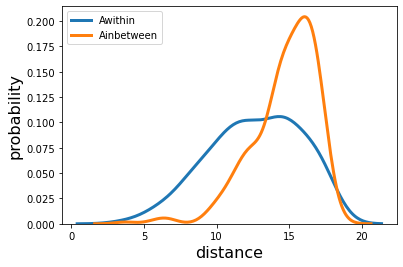

In [8]:
Awithin, Ainbetween = StatDist(Mat, "A")

sns.kdeplot(Awithin, linewidth=3, label = "Awithin")
sns.kdeplot(Ainbetween, linewidth=3, label = "Ainbetween")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

In [3]:
# flat_order = [item for sublist in A_order for item in sublist]
# Mat = Mat.add(Mat.T, fill_value=0)
# Mat = Mat[flat_order]
# Mat = Mat.reindex(flat_order)
# Mat.to_csv("HLA-A_cg_dist.csv")

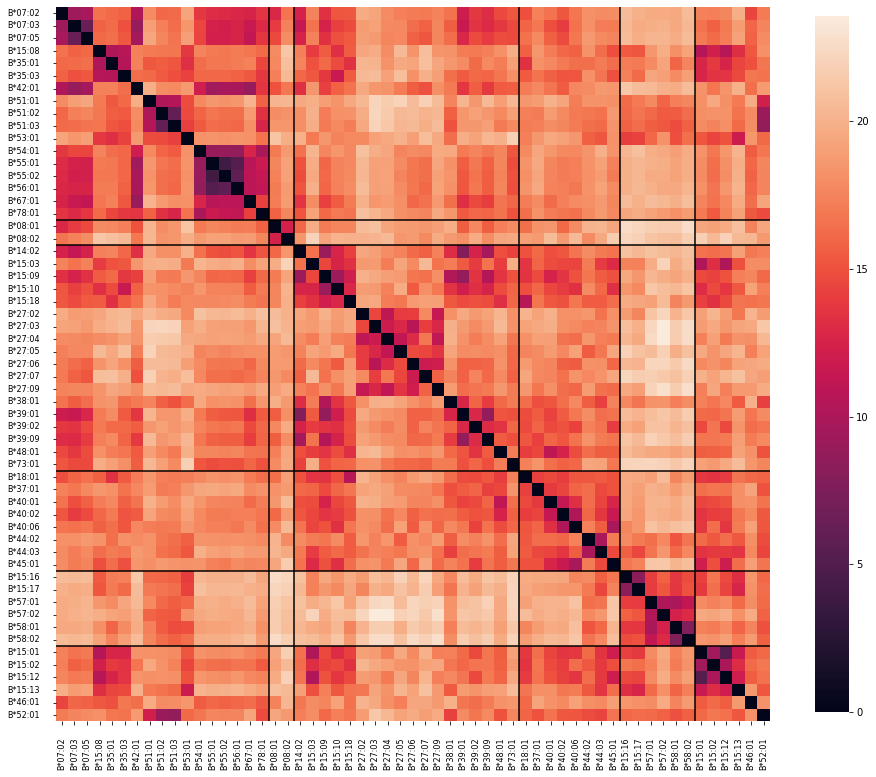

In [9]:
# B_CG_order = [
#     ['B07_02_hm_CG','B07_02_cr_CG','B07_03_hm_CG','B07_05_hm_CG','B15_08_hm_CG','B35_01_hm_CG','B35_01_cr_CG','B35_03_hm_CG','B42_01_hm_CG','B42_01_cr_CG','B51_01_hm_CG','B51_01_cr_CG','B51_02_hm_CG','B51_03_hm_CG','B53_01_hm_CG','B53_01_cr_CG','B54_01_hm_CG','B55_01_hm_CG','B55_02_hm_CG','B56_01_hm_CG','B67_01_hm_CG','B78_01_hm_CG'],
#     ['B08_01_hm_CG','B08_01_cr_CG','B08_02_hm_CG'],
#     ['B14_02_hm_CG','B14_02_cr_CG','B15_03_hm_CG','B15_09_hm_CG','B15_10_hm_CG','B15_18_hm_CG','B27_02_hm_CG','B27_03_hm_CG','B27_03_cr_CG','B27_04_hm_CG','B27_04_cr_CG','B27_05_hm_CG','B27_05_cr_CG','B27_06_hm_CG','B27_06_cr_CG','B27_07_hm_CG','B27_09_hm_CG','B27_09_cr_CG','B38_01_hm_CG','B39_01_hm_CG','B39_01_cr_CG','B39_02_hm_CG','B39_09_hm_CG','B48_01_hm_CG','B73_01_hm_CG'],
#     ['B18_01_hm_CG','B18_01_cr_CG','B37_01_hm_CG','B37_01_cr_CG','B40_01_hm_CG','B40_01_cr_CG','B40_02_hm_CG','B40_02_cr_CG','B40_06_hm_CG','B44_02_hm_CG','B44_02_cr_CG','B44_03_hm_CG','B44_03_cr_CG','B45_01_hm_CG'],
#     ['B15_16_hm_CG','B15_17_hm_CG','B57_01_hm_CG','B57_01_cr_CG','B57_02_hm_CG','B58_01_hm_CG','B58_01_cr_CG','B58_02_hm_CG'],
#     ['B15_01_hm_CG','B15_01_cr_CG','B15_02_hm_CG','B15_12_hm_CG','B15_13_hm_CG','B46_01_hm_CG','B46_01_cr_CG','B52_01_hm_CG']
#     ]
B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
B_label = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03','B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']

Mat = CGCalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-B/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", contact=contact, weight=weight)
heatmap(Mat, B_order, size=(16,16), label=B_label, line=True)
# Matrix2Dendro(Mat, "HLA-B_cg.newick")

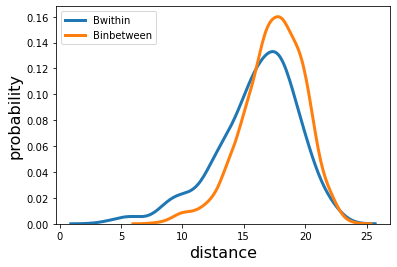

In [10]:
Bwithin, Binbetween = StatDist(Mat, "B")

sns.kdeplot(Bwithin, linewidth=3, label = "Bwithin")
sns.kdeplot(Binbetween, linewidth=3, label = "Binbetween")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

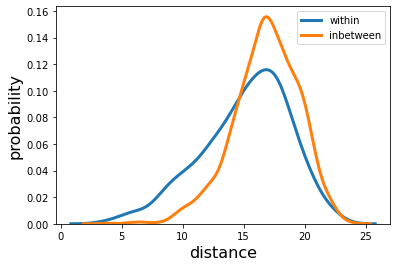

In [11]:
within = np.concatenate((Awithin, Bwithin))
inbetween = np.concatenate((Ainbetween, Binbetween))

sns.kdeplot(within, linewidth=3, label = "within")
sns.kdeplot(inbetween, linewidth=3, label = "inbetween")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

In [5]:
# flat_order = [item for sublist in B_order for item in sublist]
# Mat = Mat.add(Mat.T, fill_value=0)
# Mat = Mat[flat_order]
# Mat = Mat.reindex(flat_order)
# Mat.to_csv("HLA-B_cg_dist.csv")

### === Figure 4: all HLA class I ===

skipped alleles: ['A11_170', 'C07_31']

#### epsilon value for DBSCAN clustering

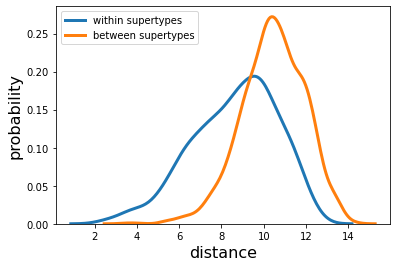

In [49]:

df = pd.read_csv("../Figures/Figure4_total_clustering/dist_stat2.csv")


fig = plt.figure()
for column in df:
    # weight = np.ones_like(df[column].dropna(), dtype=float)/len(df[column].dropna())
    # plt.hist(df[column].dropna(), weights=weight, histtype='step', fill=True, alpha=0.3, linewidth=3, label=column)

    sns.kdeplot(df[column], linewidth=3, label = column)

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

#### full-atom

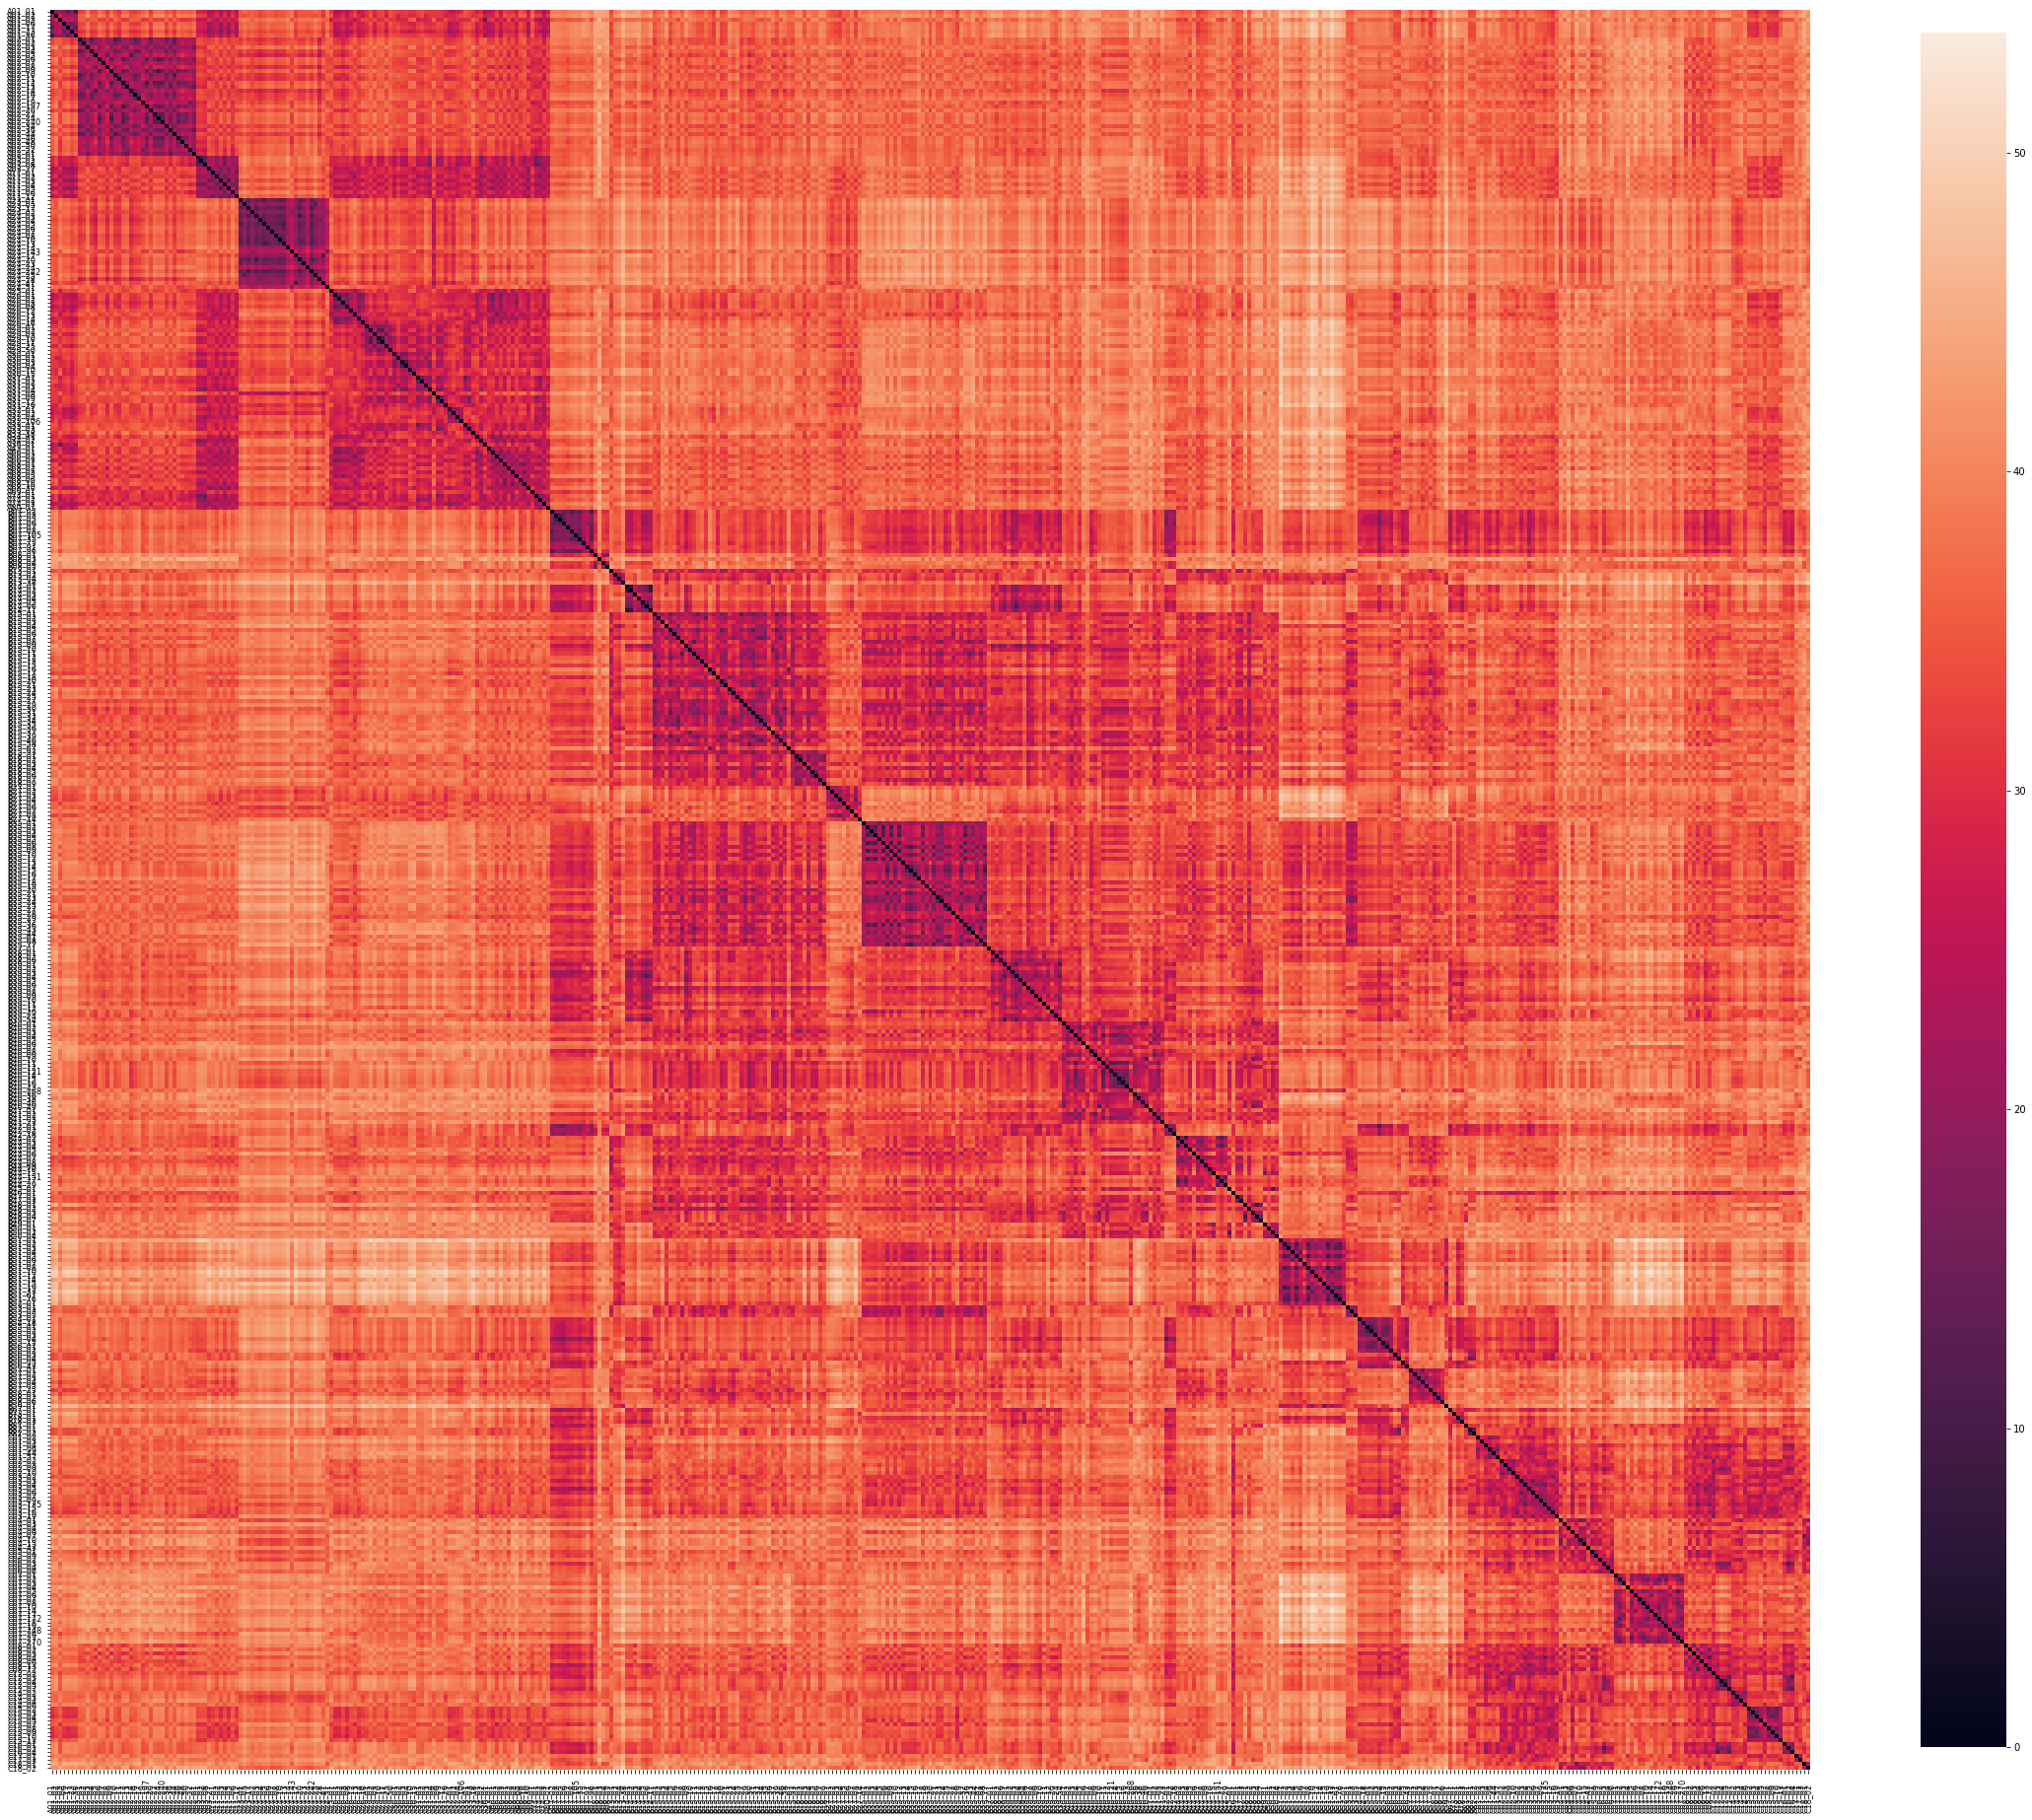

In [4]:
Mat = CalcMat("../Figures/Figure4_total_clustering/DAT", "../Figures/Figure4_total_clustering/Fig4_fa.list", None, contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=None, line=False, size=(80,80))
Matrix2Dendro(Mat, "HLA-I_fa.newick")

#### coarse-grained

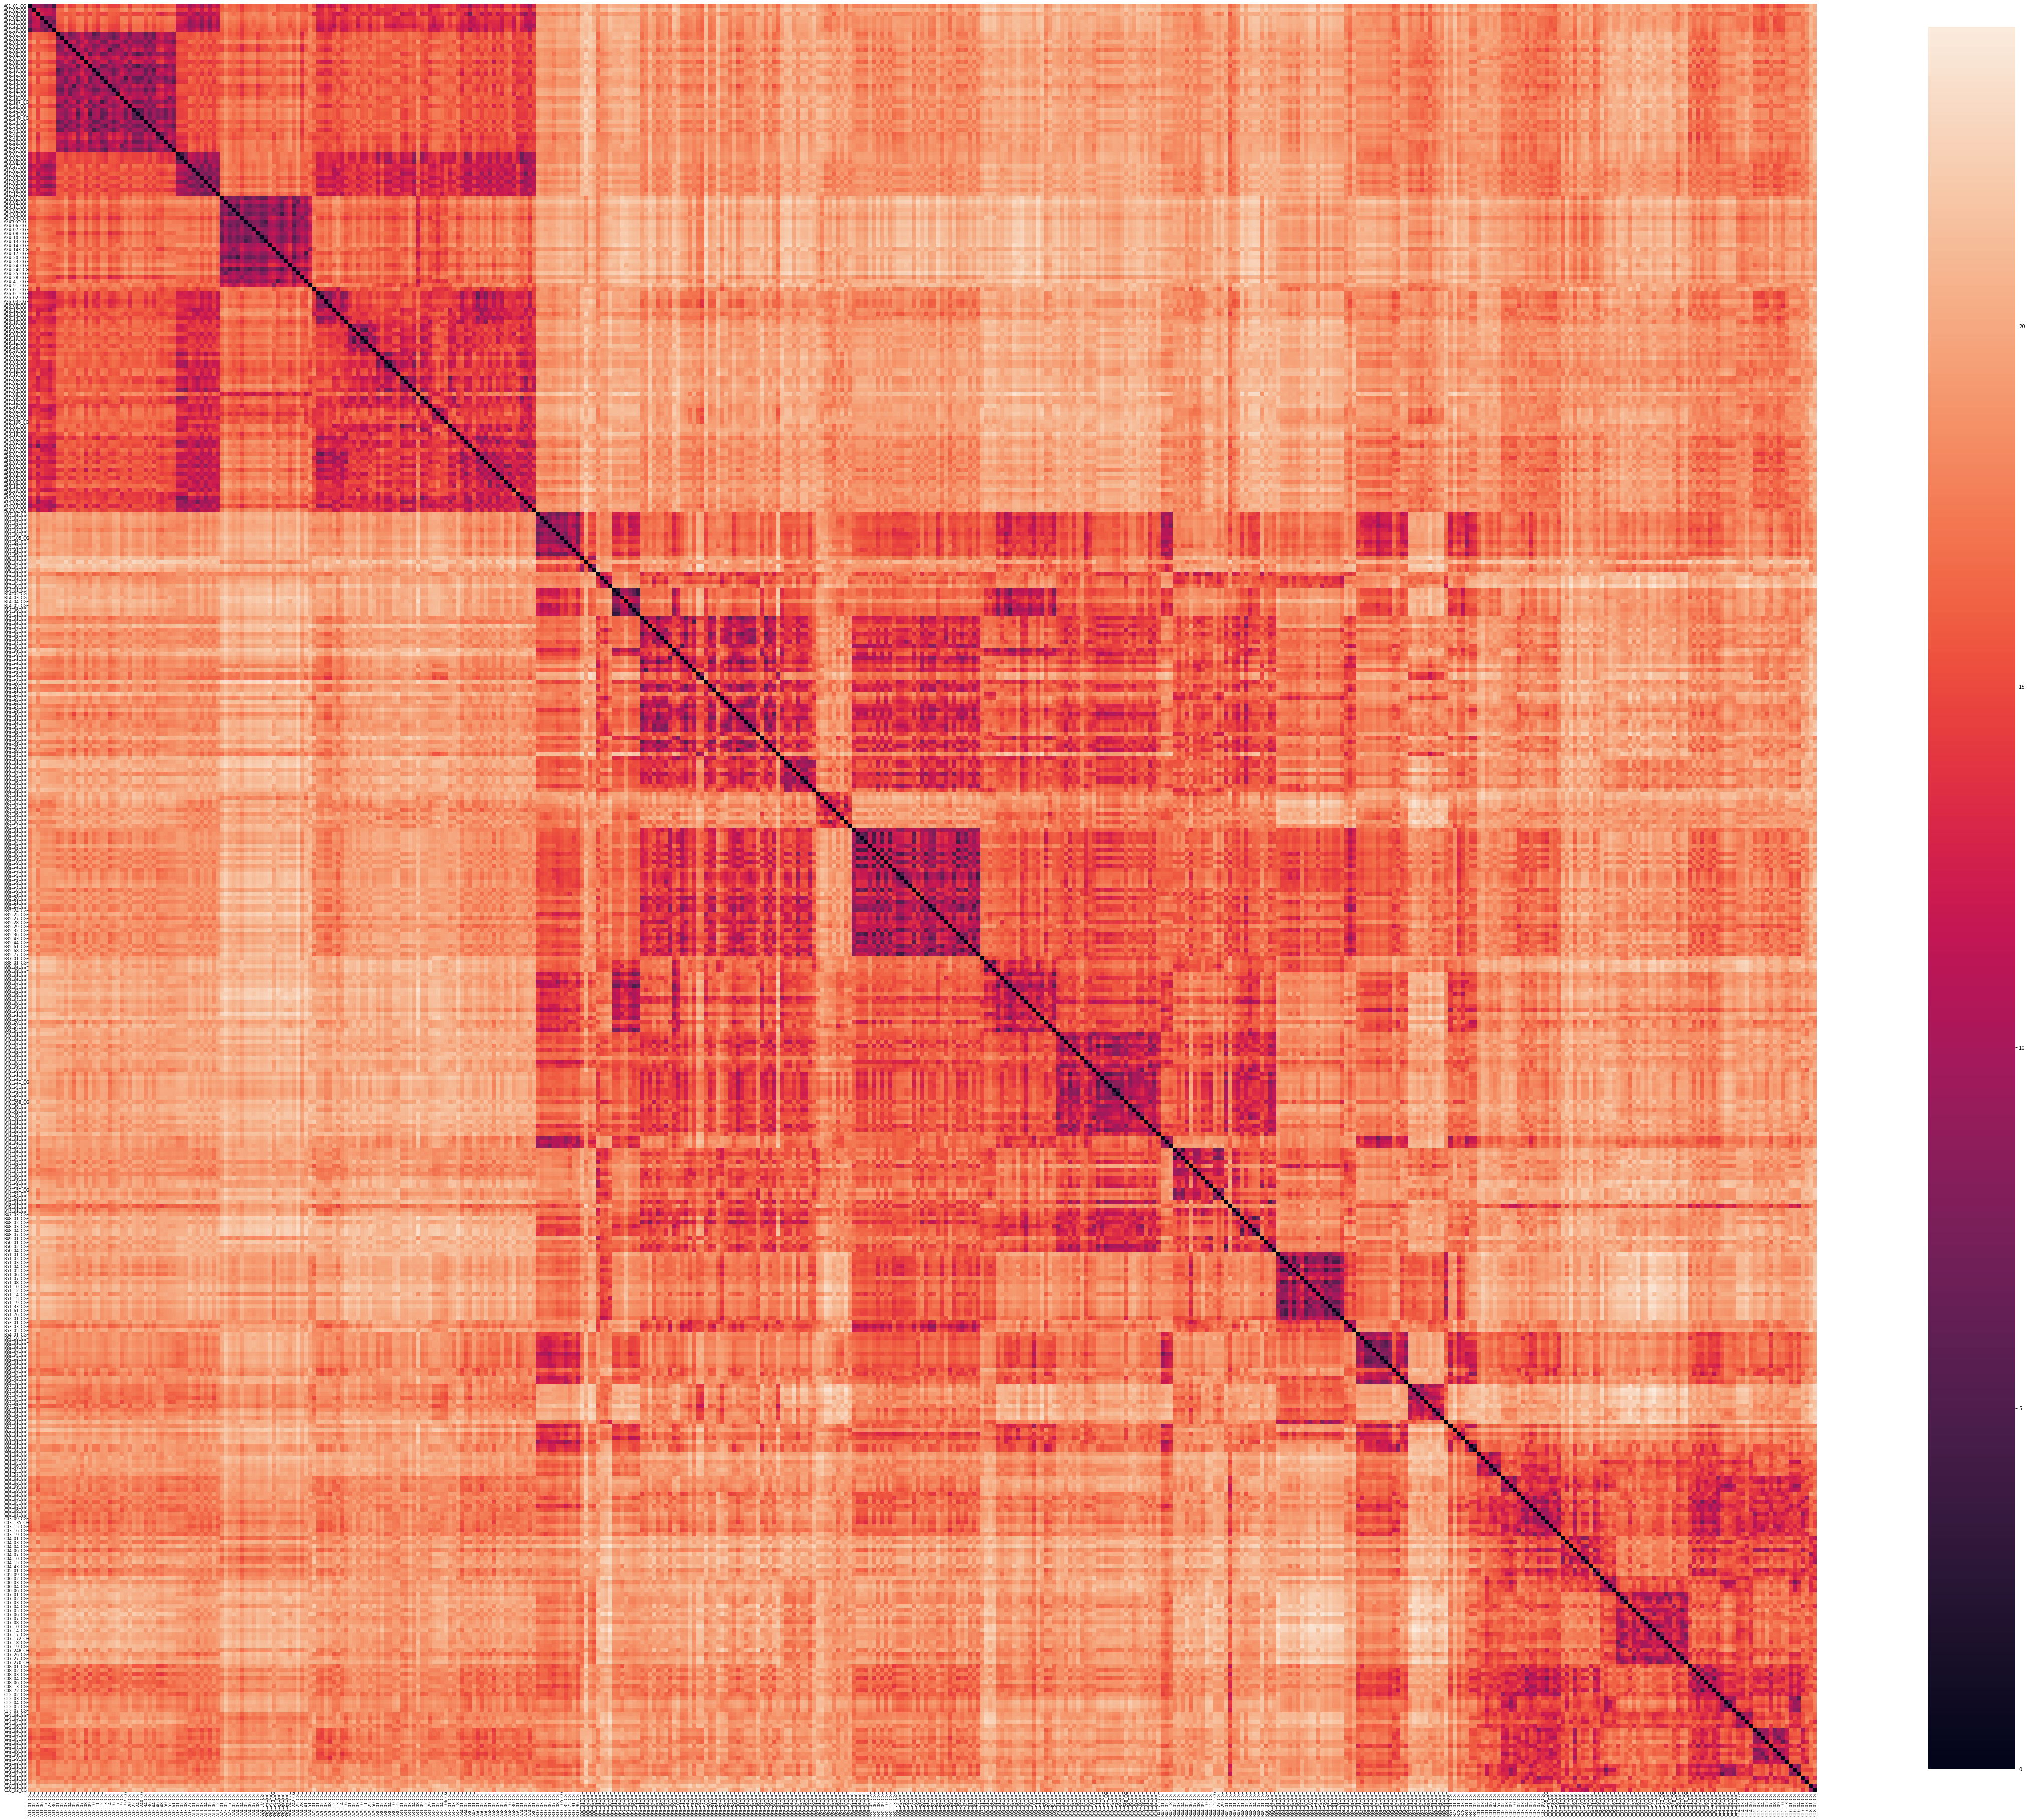

In [13]:

Mat = CGCalcMat("../Figures/Figure4_total_clustering/CG_DAT", "../Figures/Figure4_total_clustering/Fig4_cg.list", contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=None, line=False, size=(80,80))
# Matrix2Dendro(Mat, "HLA-I_cg.newick")
Mat.to_csv("HLA-I_cg_dist.csv")

#### Hierarchical clustering

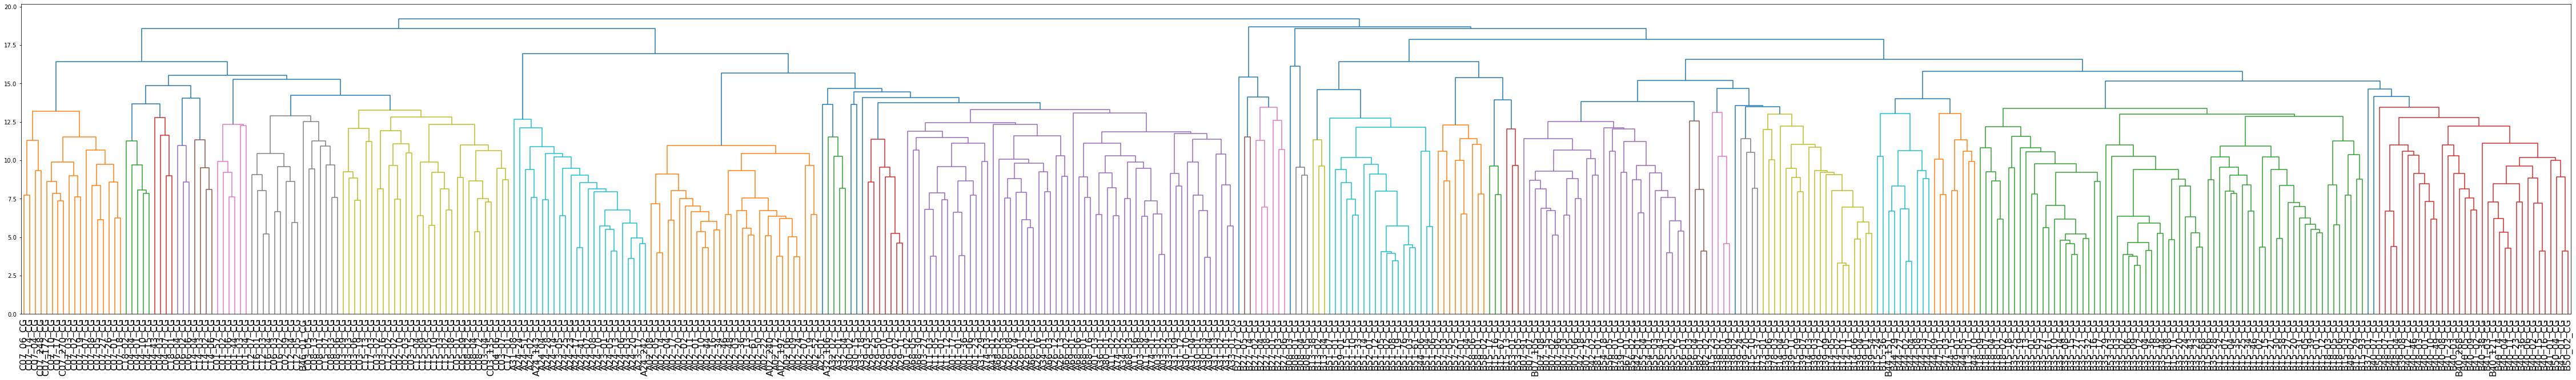

[402, 406, 400, 411, 408, 405, 407, 414, 399, 398, 410, 403, 404, 401, 413, 412, 397, 409, 446, 385, 383, 388, 389, 390, 384, 387, 445, 395, 393, 396, 429, 428, 427, 430, 367, 362, 365, 366, 363, 364, 426, 440, 423, 442, 394, 441, 370, 424, 425, 300, 375, 420, 415, 435, 417, 419, 378, 373, 376, 382, 439, 444, 372, 381, 422, 368, 371, 369, 380, 433, 437, 434, 438, 432, 431, 436, 391, 392, 416, 418, 421, 374, 379, 386, 377, 443, 97, 65, 70, 51, 61, 53, 68, 60, 49, 67, 64, 62, 69, 56, 57, 58, 48, 54, 59, 55, 52, 63, 50, 66, 14, 11, 20, 10, 22, 25, 8, 17, 7, 16, 31, 21, 29, 32, 33, 9, 30, 19, 36, 34, 26, 28, 18, 24, 12, 15, 27, 13, 23, 35, 71, 104, 102, 101, 103, 88, 92, 107, 82, 85, 86, 80, 83, 81, 84, 1, 118, 121, 40, 43, 45, 41, 47, 4, 0, 6, 3, 5, 100, 125, 111, 116, 74, 75, 78, 72, 73, 112, 79, 108, 114, 76, 77, 113, 122, 119, 115, 120, 2, 110, 126, 42, 124, 109, 117, 46, 39, 44, 123, 37, 38, 106, 98, 99, 91, 96, 87, 89, 90, 95, 94, 93, 105, 203, 201, 205, 198, 200, 204, 197, 199, 202,

In [2]:
Mat = pd.read_csv("HLA-I_cg_dist.csv", index_col=0)
cluster, order = hierarchical_cluster(Mat, N=None, L='average', threshold=14)
# L = ['complete', 'average', 'single']
# cluster = DBSCAN_cluster(Mat, 10, 2)
# print(cluster.to_string())
# print(order)

In [6]:
print(Mat.index[order].to_numpy())

['C07_06_CG' 'C07_14_CG' 'C07_04_CG' 'C07_248_CG' 'C07_172_CG' 'C07_10_CG'
 'C07_17_CG' 'C07_270_CG' 'C07_03_CG' 'C07_02_CG' 'C07_19_CG' 'C07_07_CG'
 'C07_08_CG' 'C07_05_CG' 'C07_27_CG' 'C07_26_CG' 'C07_01_CG' 'C07_18_CG'
 'C18_02_CG' 'C04_04_CG' 'C04_01_CG' 'C04_10_CG' 'C04_15_CG' 'C04_43_CG'
 'C04_03_CG' 'C04_07_CG' 'C18_01_CG' 'C06_04_CG' 'C06_02_CG' 'C06_06_CG'
 'C14_04_CG' 'C14_03_CG' 'C14_02_CG' 'C14_06_CG' 'C01_57_CG' 'C01_02_CG'
 'C01_06_CG' 'C01_44_CG' 'C01_03_CG' 'C01_04_CG' 'C12_07_CG' 'C16_01_CG'
 'C12_03_CG' 'C16_04_CG' 'C06_03_CG' 'C16_02_CG' 'C02_09_CG' 'C12_04_CG'
 'C12_05_CG' 'B46_01_CG' 'C03_05_CG' 'C08_13_CG' 'C08_01_CG' 'C15_07_CG'
 'C08_03_CG' 'C08_06_CG' 'C03_09_CG' 'C03_03_CG' 'C03_06_CG' 'C03_19_CG'
 'C15_13_CG' 'C17_03_CG' 'C03_02_CG' 'C03_16_CG' 'C12_02_CG' 'C02_02_CG'
 'C02_10_CG' 'C02_03_CG' 'C03_15_CG' 'C15_04_CG' 'C15_09_CG' 'C15_05_CG'
 'C15_10_CG' 'C15_03_CG' 'C15_02_CG' 'C15_08_CG' 'C05_01_CG' 'C05_09_CG'
 'C08_02_CG' 'C08_04_CG' 'C08_72_CG' 'C03_04_CG'

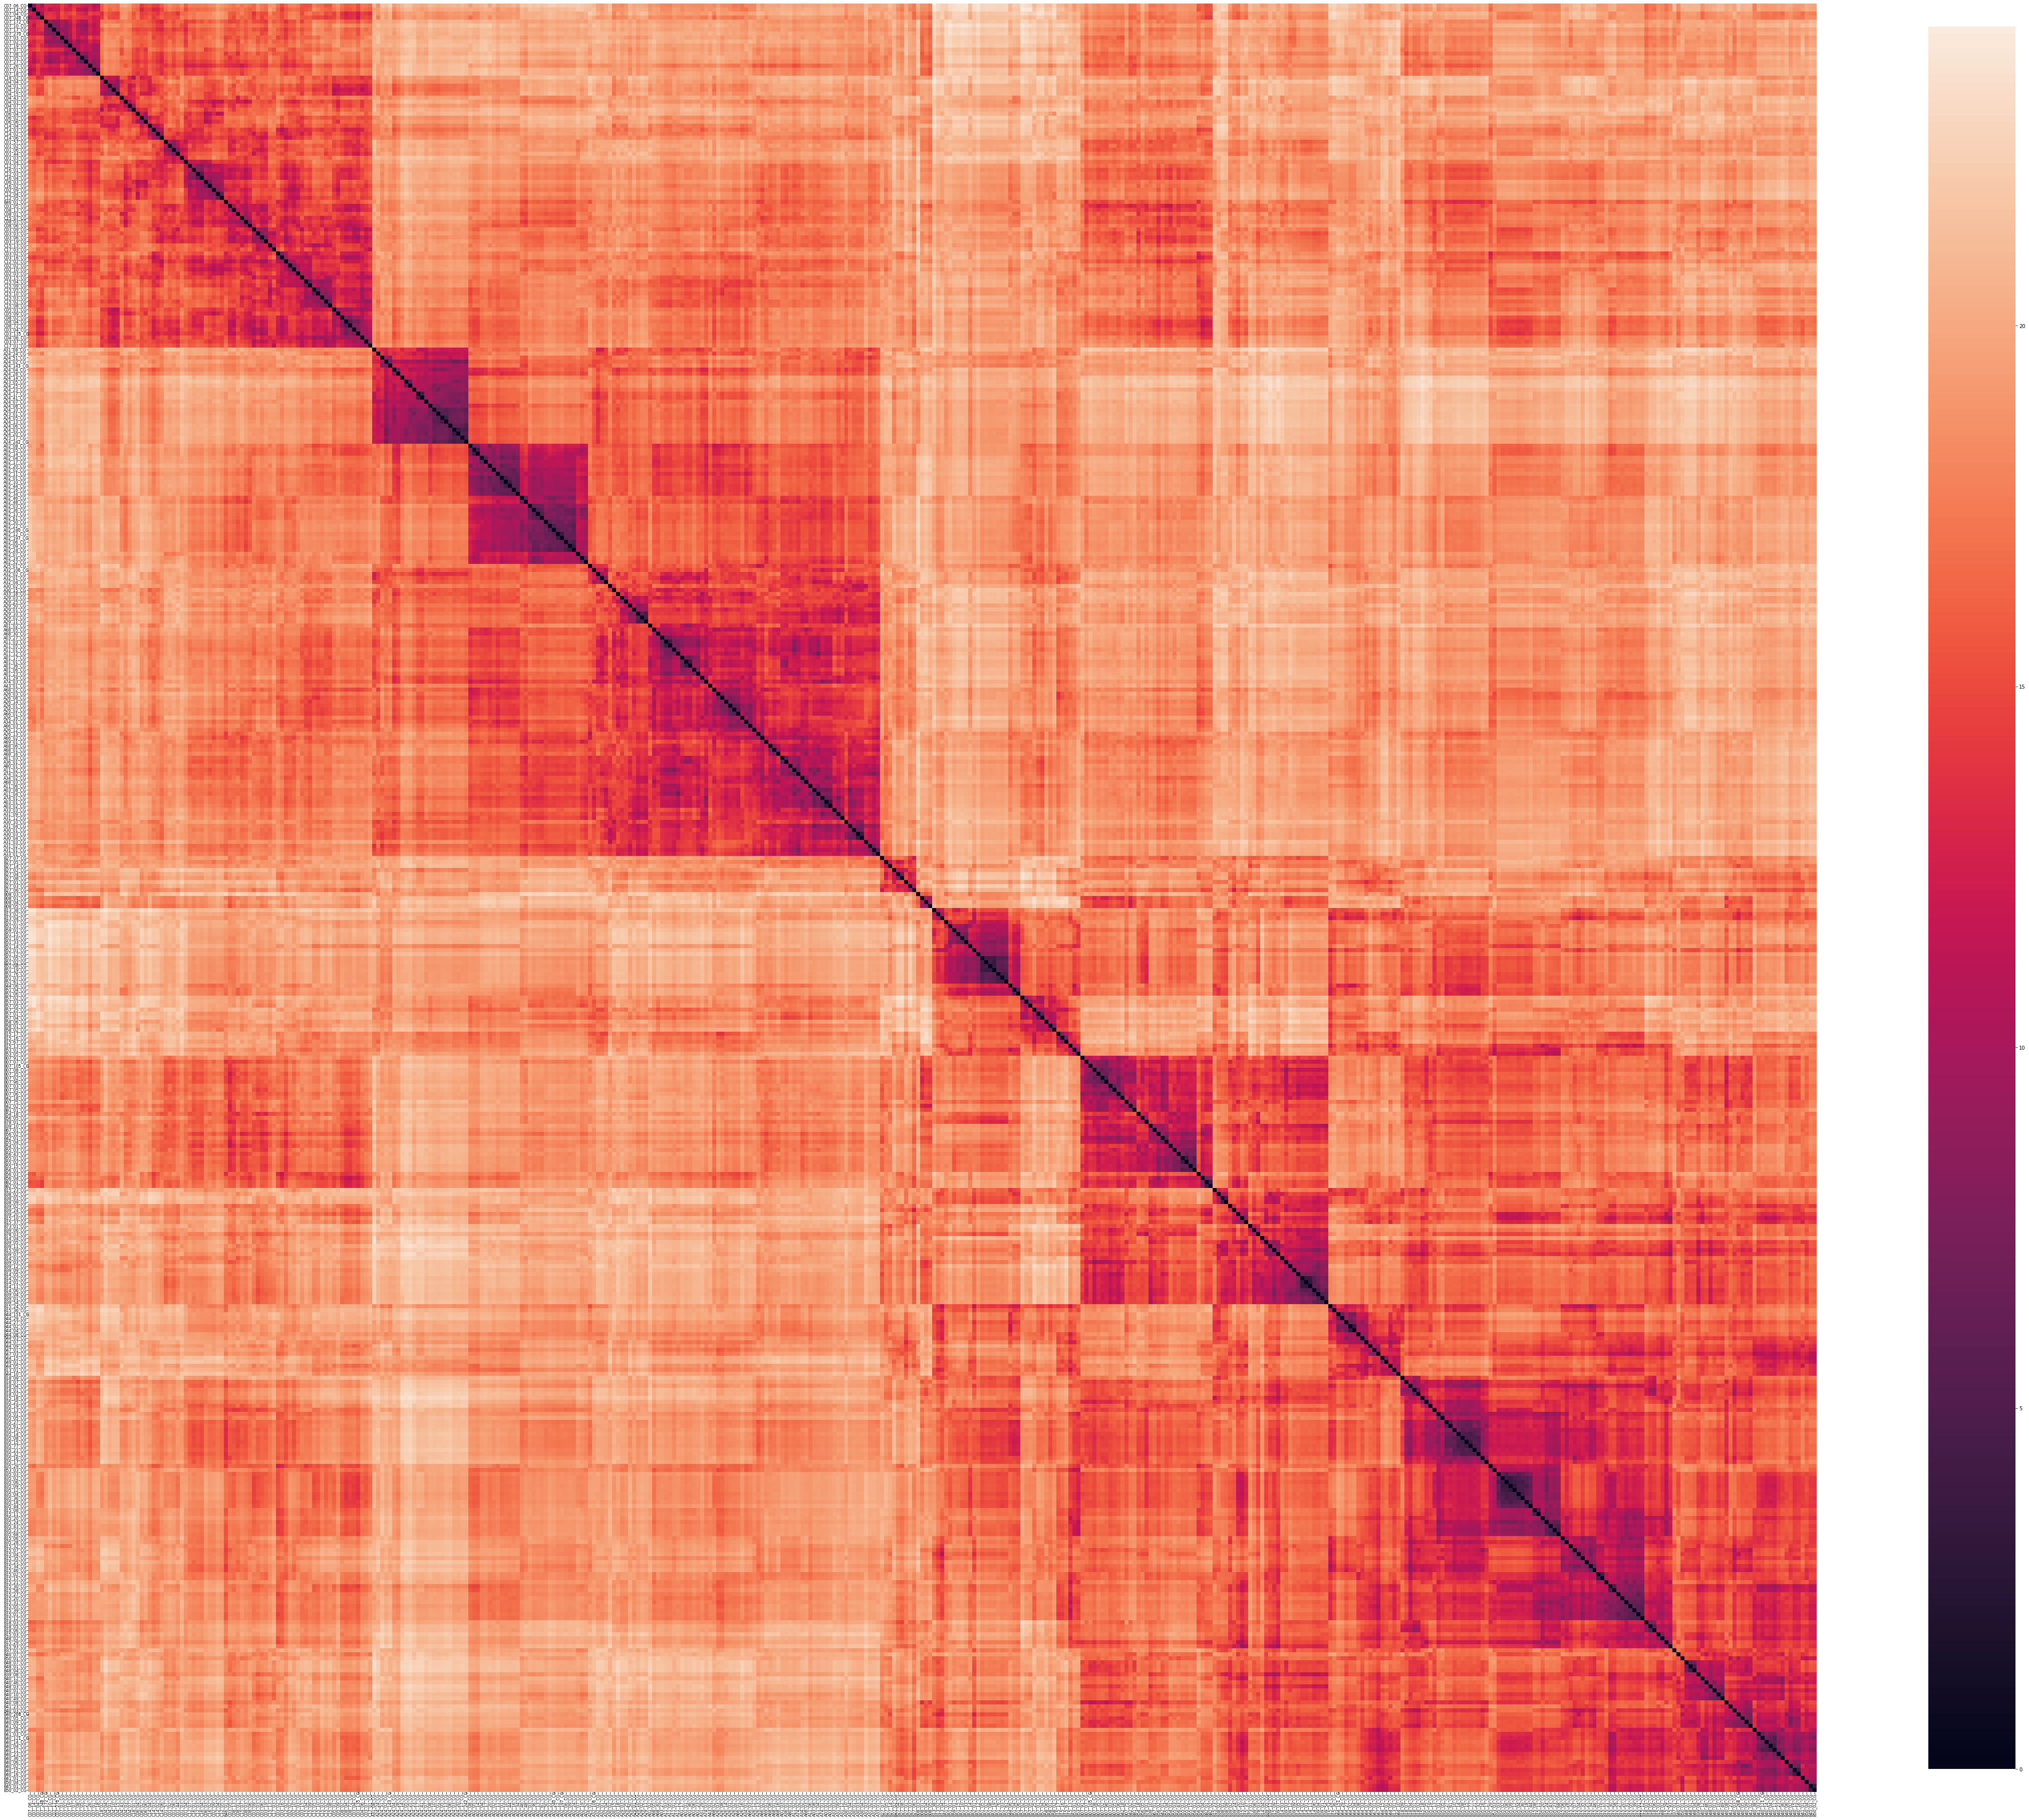

In [7]:
# full_CG_order = [['A01_01_CG','A01_06_CG','A01_17_CG','A01_23_CG','A01_36_CG','A03_27_CG','A11_01_CG','A11_03_CG','A11_05_CG','A11_12_CG','A68_05_CG','A68_30_CG'],
# ['A01_02_CG','A31_29_CG','A33_18_CG','A74_03_CG'],
# ['A01_03_CG','A03_01_CG','A03_02_CG','A03_08_CG','A11_02_CG','A11_04_CG','A11_06_CG','A31_01_CG','A31_02_CG','A31_03_CG','A33_01_CG','A34_02_CG','A36_01_CG','A68_03_CG','A74_01_CG','A74_02_CG','A80_01_CG'],
# ['A02_01_CG','A02_02_CG','A02_04_CG','A02_05_CG','A02_07_CG','A02_08_CG','A02_10_CG','A02_11_CG','A02_14_CG','A02_16_CG','A02_17_CG','A02_19_CG','A02_20_CG','A02_34_CG','A02_44_CG','A02_52_CG'],
# ['A02_03_CG','A02_06_CG','A02_09_CG','A02_12_CG','A02_13_CG','A02_197_CG','A02_22_CG','A02_24_CG','A02_240_CG','A02_36_CG','A02_46_CG','A02_48_CG','A02_50_CG','A02_61_CG'],
# ['A23_01_CG','A23_05_CG','A23_17_CG','A24_03_CG','A24_04_CG','A24_05_CG','A24_06_CG','A24_07_CG','A24_08_CG','A24_10_CG','A24_13_CG','A24_14_CG','A24_17_CG','A24_20_CG','A24_23_CG','A24_24_CG','A24_242_CG','A24_25_CG','A24_28_CG','A24_41_CG'],
# ['A24_02_CG','A24_143_CG','A24_51_CG'],
# ['A25_01_CG','A26_13_CG','A66_02_CG'],
# ['A26_01_CG','A26_02_CG','A26_03_CG','A26_08_CG','A26_12_CG','A26_14_CG','A26_16_CG','A34_01_CG','A43_01_CG','A66_01_CG','A66_03_CG','A68_02_CG'],
# ['A29_01_CG','A29_02_CG','A29_03_CG','A29_10_CG','A29_11_CG','A29_25_CG','A29_50_CG'],
# ['A30_01_CG','A30_02_CG','A30_03_CG','A30_04_CG','A31_04_CG','A31_09_CG','A31_12_CG','A33_03_CG'],
# ['A30_10_CG','A30_15_CG'],
# ['A32_01_CG','A32_02_CG','A32_04_CG','A32_106_CG'],
# ['A68_01_CG','A68_06_CG','A68_16_CG','A69_01_CG'],
# ['B07_02_CG','B07_03_CG','B07_05_CG','B07_06_CG','B07_07_CG','B07_08_CG','B07_105_CG','B07_35_CG','B07_75_CG','B07_91_CG','B07_96_CG','B42_01_CG','B42_02_CG','B42_18_CG','B55_04_CG','B81_01_CG'],
# ['B08_01_CG','B08_04_CG','B08_05_CG','B13_01_CG','B44_05_CG','B44_10_CG','B44_15_CG','B49_01_CG'],
# ['B13_02_CG','B13_04_CG','B13_38_CG'],
# ['B14_01_CG','B14_02_CG','B14_03_CG','B14_04_CG','B14_05_CG','B14_06_CG','B14_11_CG','B39_01_CG','B39_03_CG','B39_04_CG','B39_09_CG','B39_12_CG','B39_54_CG'],
# ['B15_01_CG','B15_02_CG','B15_04_CG','B15_05_CG','B15_06_CG','B15_07_CG','B15_12_CG','B15_15_CG','B15_20_CG','B15_25_CG','B15_27_CG','B15_30_CG','B15_31_CG','B15_32_CG','B15_34_CG','B15_35_CG','B15_39_CG','B15_46_CG','B15_58_CG','B18_04_CG','B35_28_CG'],
# ['B15_03_CG','B15_29_CG','B15_93_CG','B18_03_CG','B18_05_CG','B18_06_CG','B48_02_CG'],
# ['B15_16_CG','B15_17_CG','B15_67_CG'],
# ['B15_08_CG','B15_11_CG','B15_21_CG','B35_02_CG','B35_03_CG','B35_04_CG','B35_06_CG','B35_09_CG','B35_12_CG','B35_18_CG','B35_20_CG','B35_23_CG','B35_24_CG','B35_29_CG','B35_36_CG','B35_43_CG','B35_44_CG','B35_68_CG','B53_03_CG'],
# ['B15_09_CG','B38_01_CG','B38_02_CG','B38_09_CG','B39_07_CG','B39_11_CG'],
# ['B15_10_CG','B15_37_CG','B39_05_CG','B39_20_CG','B39_24_CG'],
# ['B15_13_CG','B53_01_CG','B53_05_CG'],
# ['B15_18_CG','B35_25_CG'],
# ['B15_24_CG','B15_36_CG'],
# ['B18_01_CG','B18_02_CG','B18_07_CG','B18_09_CG'],
# ['B27_01_CG','B27_03_CG','B27_06_CG'],
# ['B27_02_CG','B27_04_CG','B27_08_CG'],
# ['B39_06_CG','B73_01_CG','B78_03_CG'],
# ['B39_08_CG','B40_01_CG','B40_10_CG','B40_46_CG','B40_49_CG','B48_01_CG','B48_03_CG','B48_04_CG','B48_07_CG'],
# ['B27_05_CG','B27_14_CG'],
# ['B35_01_CG','B35_05_CG','B35_08_CG','B35_10_CG','B35_13_CG','B35_14_CG','B35_15_CG','B35_16_CG','B35_17_CG','B35_19_CG','B35_21_CG','B35_27_CG','B35_32_CG','B35_61_CG','B35_77_CG'],
# ['B39_10_CG','B56_02_CG','B56_04_CG','B67_01_CG','B82_01_CG','B82_02_CG'],
# ['B40_02_CG','B40_03_CG','B40_05_CG','B40_08_CG','B40_09_CG','B40_268_CG','B41_02_CG'],
# ['B40_04_CG','B40_06_CG','B40_11_CG','B40_12_CG','B40_121_CG','B40_14_CG','B40_15_CG','B40_16_CG','B40_23_CG','B40_36_CG','B40_38_CG','B41_01_CG','B41_03_CG','B45_01_CG','B50_02_CG','B50_04_CG'],
# ['B41_23_CG','B50_01_CG'],
# ['B44_02_CG','B44_03_CG','B44_04_CG','B44_07_CG','B44_08_CG','B44_151_CG','B44_27_CG','B44_29_CG'],
# ['B44_06_CG','B51_04_CG','B51_06_CG','B44_09_CG','B47_01_CG','B47_03_CG'],
# ['B51_01_CG','B51_02_CG','B51_03_CG','B51_05_CG','B51_08_CG','B51_10_CG','B51_12_CG','B51_14_CG','B51_15_CG','B51_19_CG','B51_33_CG','B51_61_CG','B51_76_CG','B52_01_CG','B59_01_CG'],
# ['B54_01_CG','B54_18_CG','B55_01_CG','B55_02_CG','B55_03_CG','B55_15_CG','B56_01_CG','B56_05_CG','B56_43_CG','B78_01_CG'],
# ['B57_01_CG','B57_04_CG','B57_25_CG','B58_01_CG','B58_02_CG','B58_06_CG'],
# ['B57_02_CG','B57_03_CG','B57_05_CG'],
# ['B46_01_CG','C03_05_CG','C08_01_CG','C08_03_CG','C08_06_CG','C08_13_CG','C15_07_CG'],
# ['C01_02_CG','C01_03_CG','C01_04_CG','C01_06_CG','C01_44_CG','C01_57_CG'],
# ['C02_02_CG','C02_03_CG','C02_10_CG','C03_02_CG','C03_16_CG','C12_02_CG'],
# ['C02_09_CG','C06_03_CG','C12_03_CG','C12_04_CG','C12_05_CG','C12_07_CG','C16_01_CG','C16_02_CG','C16_04_CG'],
# ['C03_03_CG','C03_06_CG','C03_09_CG','C03_19_CG','C17_03_CG'],
# ['C03_04_CG','C03_07_CG','C03_135_CG','C03_15_CG','C04_06_CG','C05_01_CG','C05_09_CG','C08_02_CG','C08_04_CG','C08_72_CG','C17_01_CG'],
# ['C04_01_CG','C04_04_CG','C04_10_CG','C04_15_CG','C18_02_CG'],
# ['C04_03_CG','C04_07_CG','C04_43_CG','C18_01_CG'],
# ['C06_02_CG','C06_04_CG','C06_06_CG'],
# ['C07_01_CG','C07_05_CG','C07_07_CG','C07_08_CG','C07_18_CG','C07_26_CG','C07_27_CG'],
# ['C07_02_CG','C07_03_CG','C07_10_CG','C07_17_CG','C07_172_CG','C07_19_CG','C07_270_CG'],
# ['C07_04_CG','C07_06_CG','C07_14_CG','C07_248_CG','C14_02_CG','C14_03_CG','C14_04_CG','C14_06_CG'],
# ['C15_02_CG','C15_03_CG','C15_04_CG','C15_05_CG','C15_08_CG','C15_09_CG','C15_10_CG','C15_13_CG'],
# ['A31_08_CG','B08_03_CG','B15_23_CG','B27_07_CG','B37_01_CG','B39_02_CG','B40_07_CG','B51_07_CG','B56_03_CG']]

full_CG_order = ['C07_06_CG','C07_14_CG','C07_04_CG','C07_248_CG','C07_172_CG','C07_10_CG','C07_17_CG','C07_270_CG','C07_03_CG','C07_02_CG','C07_19_CG',
'C07_07_CG','C07_08_CG','C07_05_CG','C07_27_CG','C07_26_CG','C07_01_CG','C07_18_CG','C18_02_CG','C04_04_CG','C04_01_CG','C04_10_CG',
'C04_15_CG','C04_43_CG','C04_03_CG','C04_07_CG','C18_01_CG','C06_04_CG','C06_02_CG','C06_06_CG','C14_04_CG','C14_03_CG','C14_02_CG',
'C14_06_CG','C01_57_CG','C01_02_CG','C01_06_CG','C01_44_CG','C01_03_CG','C01_04_CG','C12_07_CG','C16_01_CG','C12_03_CG','C16_04_CG',
'C06_03_CG','C16_02_CG','C02_09_CG','C12_04_CG','C12_05_CG','B46_01_CG','C03_05_CG','C08_13_CG','C08_01_CG','C15_07_CG','C08_03_CG',
'C08_06_CG','C03_09_CG','C03_03_CG','C03_06_CG','C03_19_CG','C15_13_CG','C17_03_CG','C03_02_CG','C03_16_CG','C12_02_CG','C02_02_CG',
'C02_10_CG','C02_03_CG','C03_15_CG','C15_04_CG','C15_09_CG','C15_05_CG','C15_10_CG','C15_03_CG','C15_02_CG','C15_08_CG','C05_01_CG',
'C05_09_CG','C08_02_CG','C08_04_CG','C08_72_CG','C03_04_CG','C03_135_CG','C04_06_CG','C03_07_CG','C17_01_CG','A31_08_CG','A24_24_CG',
'A24_51_CG','A24_02_CG','A24_143_CG','A24_04_CG','A24_28_CG','A24_14_CG','A23_05_CG','A24_25_CG','A24_23_CG','A24_17_CG','A24_41_CG',
'A24_07_CG','A24_08_CG','A24_10_CG','A23_01_CG','A24_05_CG','A24_13_CG','A24_06_CG','A24_03_CG','A24_20_CG','A23_17_CG','A24_242_CG',
'A02_08_CG','A02_05_CG','A02_14_CG','A02_04_CG','A02_17_CG','A02_20_CG','A02_02_CG','A02_11_CG','A02_01_CG','A02_10_CG','A02_44_CG',
'A02_16_CG','A02_34_CG','A02_46_CG','A02_48_CG','A02_03_CG','A02_36_CG','A02_13_CG','A02_61_CG','A02_50_CG','A02_22_CG','A02_240_CG',
'A02_12_CG','A02_197_CG','A02_06_CG','A02_09_CG','A02_24_CG','A02_07_CG','A02_19_CG','A02_52_CG','A25_01_CG','A32_106_CG','A32_02_CG',
'A32_01_CG','A32_04_CG','A30_02_CG','A30_15_CG','A33_18_CG','A29_03_CG','A29_25_CG','A29_50_CG','A29_01_CG','A29_10_CG','A29_02_CG',
'A29_11_CG','A01_02_CG','A68_05_CG','A68_30_CG','A03_27_CG','A11_03_CG','A11_05_CG','A11_01_CG','A11_12_CG','A01_17_CG','A01_01_CG',
'A01_36_CG','A01_06_CG','A01_23_CG','A31_29_CG','A74_03_CG','A43_01_CG','A68_02_CG','A26_03_CG','A26_08_CG','A26_14_CG','A26_01_CG',
'A26_02_CG','A66_01_CG','A26_16_CG','A34_01_CG','A66_03_CG','A26_12_CG','A26_13_CG','A66_02_CG','A69_01_CG','A68_06_CG','A68_01_CG',
'A68_16_CG','A01_03_CG','A36_01_CG','A80_01_CG','A11_02_CG','A74_02_CG','A34_02_CG','A68_03_CG','A11_06_CG','A03_08_CG','A11_04_CG',
'A74_01_CG','A03_01_CG','A03_02_CG','A33_03_CG','A31_09_CG','A31_12_CG','A30_10_CG','A31_04_CG','A30_01_CG','A30_03_CG','A30_04_CG',
'A31_03_CG','A31_02_CG','A31_01_CG','A33_01_CG','B27_07_CG','B27_05_CG','B27_14_CG','B27_02_CG','B27_04_CG','B27_08_CG','B27_01_CG',
'B27_03_CG','B27_06_CG','B08_03_CG','B08_01_CG','B08_04_CG','B08_05_CG','B13_38_CG','B13_02_CG','B13_04_CG','B51_07_CG','B51_01_CG',
'B59_01_CG','B51_15_CG','B51_10_CG','B51_33_CG','B51_14_CG','B52_01_CG','B51_12_CG','B51_05_CG','B51_02_CG','B51_08_CG','B51_19_CG',
'B51_76_CG','B51_03_CG','B51_61_CG','B44_06_CG','B51_04_CG','B51_06_CG','B57_02_CG','B57_03_CG','B57_05_CG','B57_25_CG','B57_01_CG',
'B57_04_CG','B58_06_CG','B58_01_CG','B58_02_CG','B15_17_CG','B15_16_CG','B15_67_CG','B15_13_CG','B53_01_CG','B53_05_CG','B07_91_CG',
'B07_07_CG','B07_105_CG','B07_08_CG','B07_35_CG','B07_02_CG','B07_96_CG','B07_03_CG','B07_05_CG','B07_06_CG','B42_18_CG','B07_75_CG',
'B42_02_CG','B81_01_CG','B54_18_CG','B56_05_CG','B78_01_CG','B39_10_CG','B67_01_CG','B56_02_CG','B42_01_CG','B55_04_CG','B54_01_CG',
'B55_03_CG','B56_43_CG','B55_01_CG','B55_02_CG','B55_15_CG','B56_01_CG','B56_03_CG','B56_04_CG','B82_01_CG','B82_02_CG','B15_23_CG',
'B38_02_CG','B38_01_CG','B38_09_CG','B39_02_CG','B39_24_CG','B39_20_CG','B15_10_CG','B15_37_CG','B73_01_CG','B39_06_CG','B78_03_CG',
'B14_04_CG','B39_05_CG','B39_11_CG','B15_09_CG','B39_07_CG','B14_03_CG','B39_03_CG','B39_12_CG','B39_09_CG','B14_05_CG','B14_02_CG',
'B14_01_CG','B14_11_CG','B14_06_CG','B39_04_CG','B39_01_CG','B39_54_CG','B15_24_CG','B15_36_CG','B44_151_CG','B44_29_CG','B44_27_CG',
'B44_02_CG','B44_04_CG','B44_08_CG','B44_03_CG','B44_07_CG','B44_09_CG','B47_01_CG','B47_03_CG','B44_15_CG','B49_01_CG','B44_05_CG',
'B13_01_CG','B44_10_CG','B18_09_CG','B18_07_CG','B18_04_CG','B18_01_CG','B18_02_CG','B15_18_CG','B35_25_CG','B35_19_CG','B35_13_CG',
'B35_01_CG','B35_05_CG','B35_27_CG','B35_61_CG','B35_10_CG','B35_14_CG','B35_08_CG','B35_15_CG','B35_77_CG','B35_21_CG','B35_32_CG',
'B35_16_CG','B35_17_CG','B35_29_CG','B53_03_CG','B35_03_CG','B35_02_CG','B35_06_CG','B35_09_CG','B35_12_CG','B35_04_CG','B35_36_CG',
'B35_18_CG','B35_44_CG','B15_08_CG','B15_11_CG','B35_20_CG','B35_24_CG','B35_43_CG','B35_23_CG','B35_68_CG','B15_06_CG','B35_28_CG',
'B15_32_CG','B15_07_CG','B15_04_CG','B15_35_CG','B15_25_CG','B15_34_CG','B15_46_CG','B15_02_CG','B15_15_CG','B15_21_CG','B15_30_CG',
'B15_58_CG','B15_27_CG','B15_20_CG','B15_31_CG','B15_05_CG','B15_39_CG','B15_01_CG','B15_12_CG','B18_03_CG','B18_05_CG','B18_06_CG',
'B15_03_CG','B48_02_CG','B15_29_CG','B15_93_CG','B37_01_CG','B40_07_CG','B50_01_CG','B48_07_CG','B48_01_CG','B48_04_CG','B39_08_CG',
'B40_12_CG','B40_46_CG','B48_03_CG','B40_01_CG','B40_10_CG','B40_49_CG','B40_08_CG','B41_23_CG','B40_03_CG','B40_268_CG','B40_05_CG',
'B40_09_CG','B41_02_CG','B40_38_CG','B41_03_CG','B40_121_CG','B40_14_CG','B40_04_CG','B40_11_CG','B40_23_CG','B40_36_CG','B40_06_CG',
'B40_02_CG','B40_15_CG','B40_16_CG','B41_01_CG','B50_04_CG','B45_01_CG','B50_02_CG']
heatmap(Mat, order=full_CG_order, size=(80,80))

### Supplimentary Figure: clustering using sequence based methods

#### Full sequence

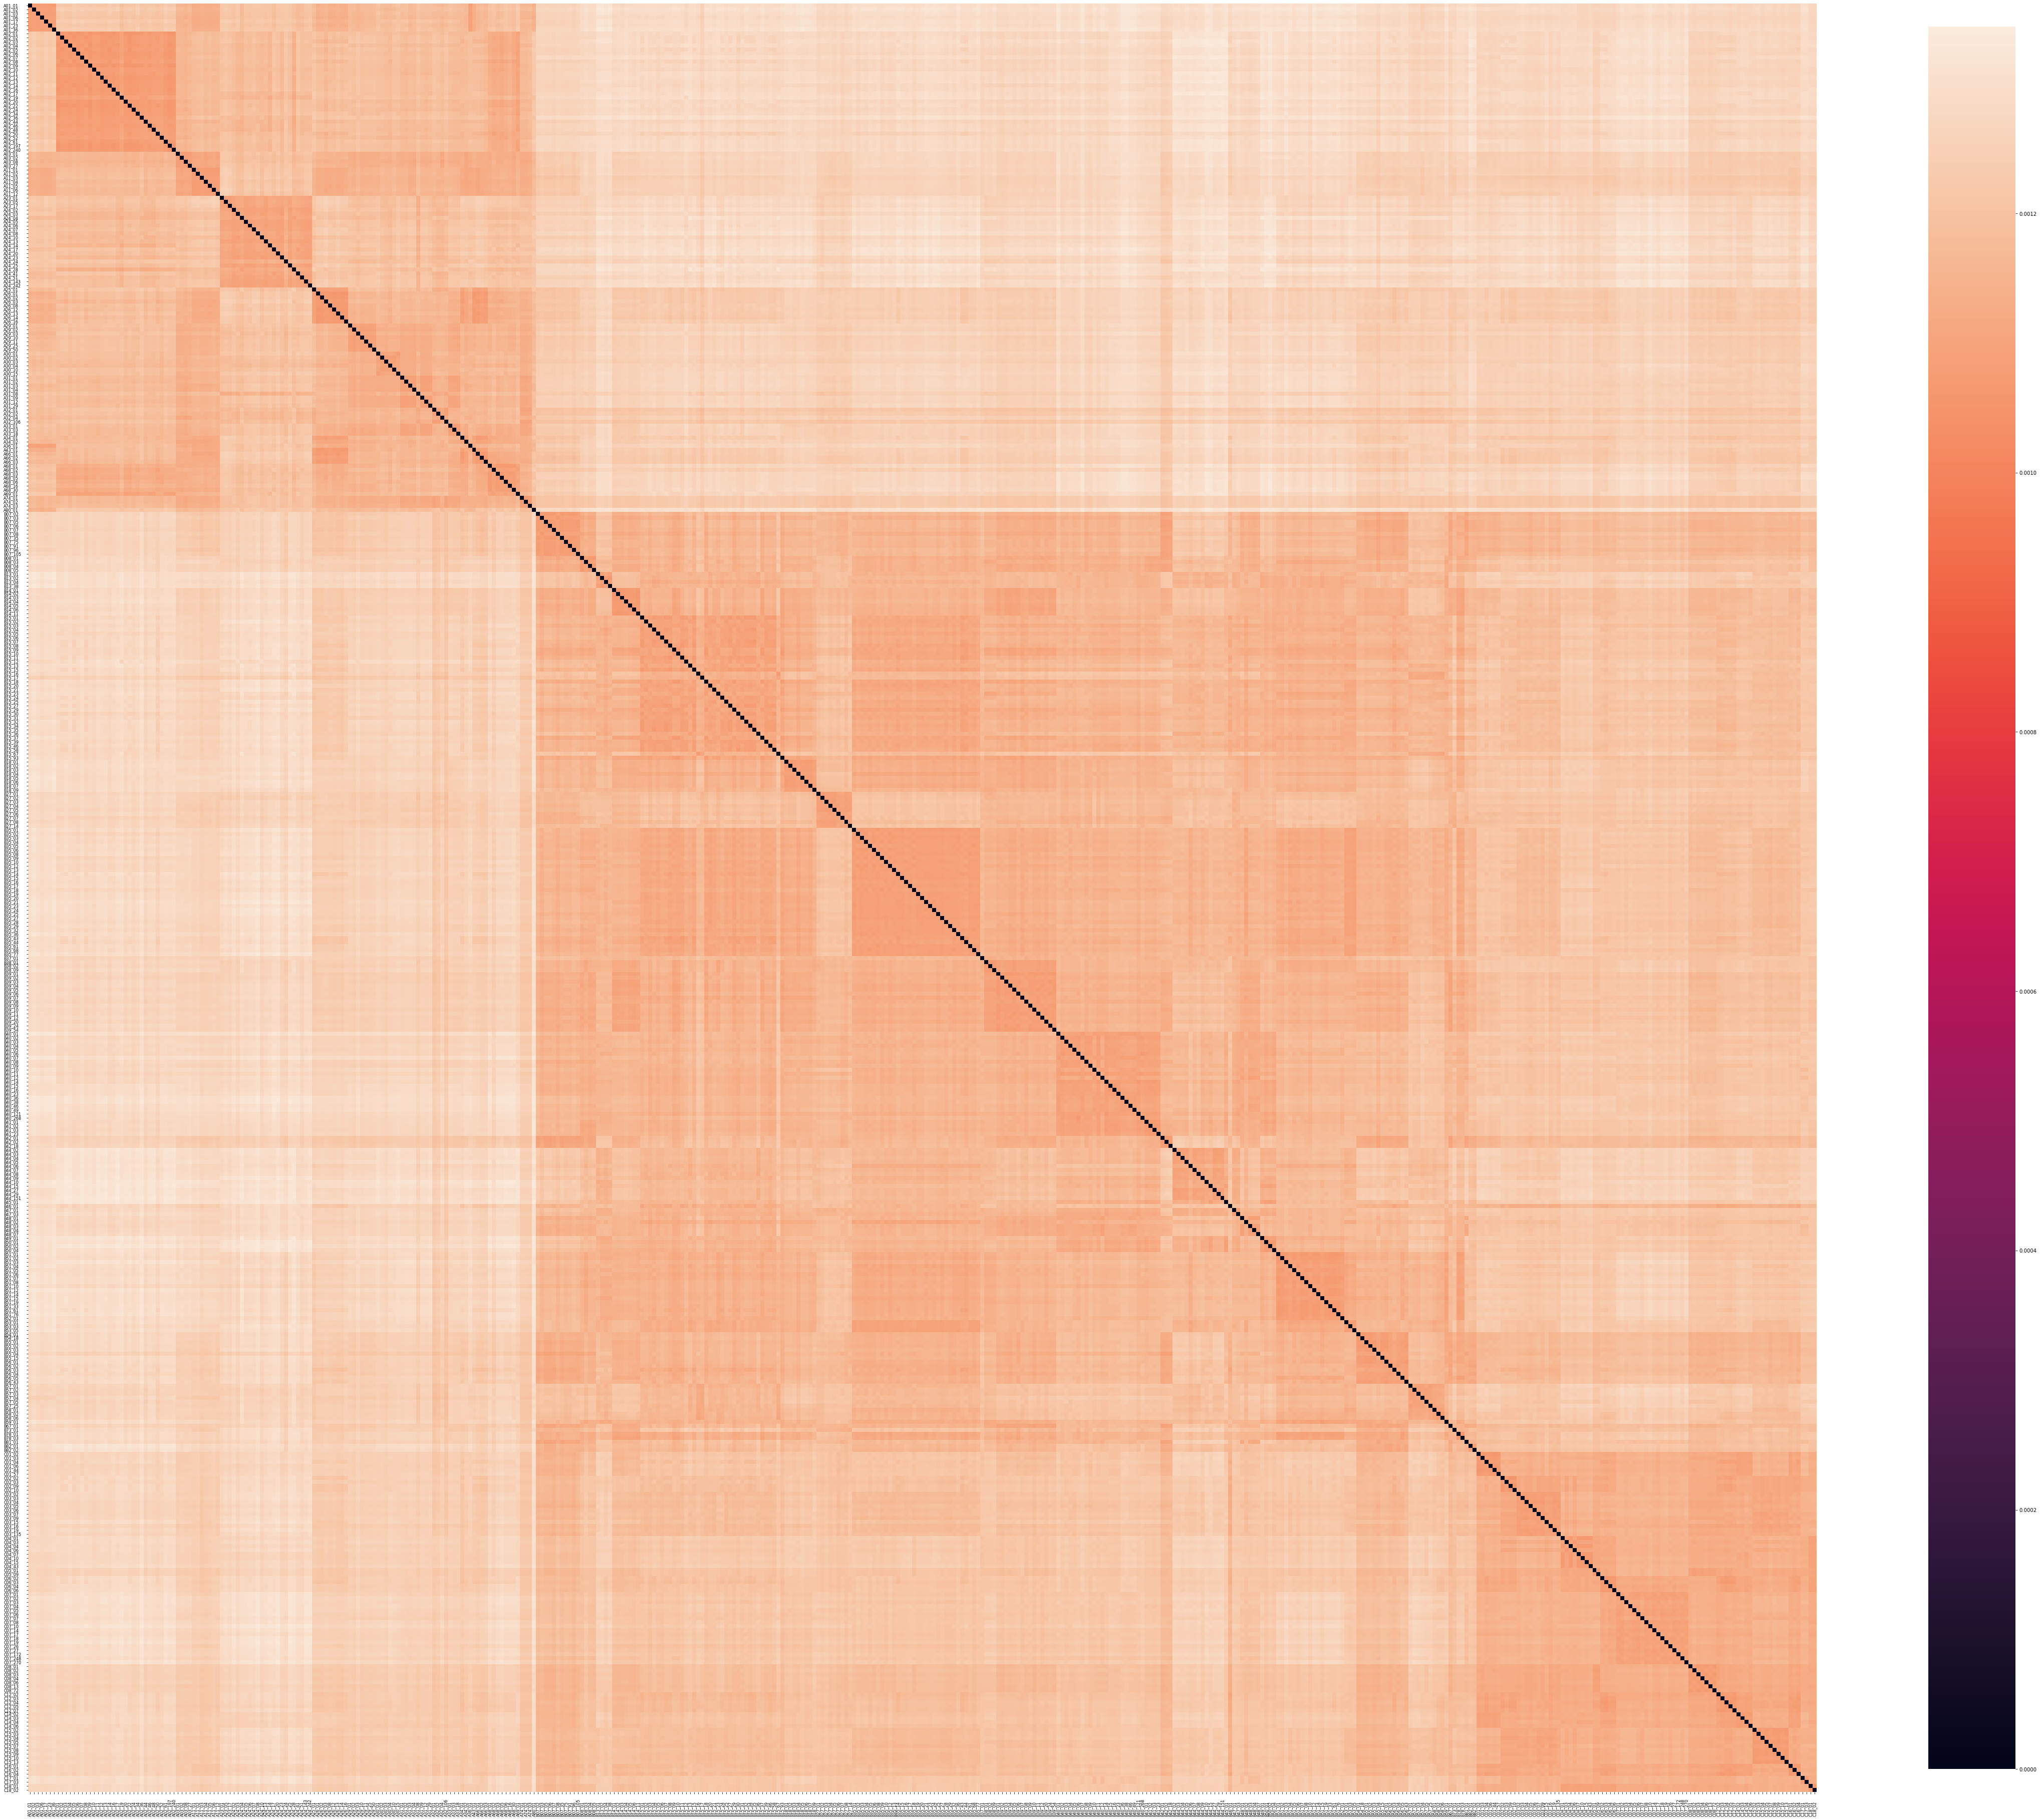

In [9]:
from SupertypeTools import MSAMat
Mat = MSAMat("pop_HLA.faa", 1)
heatmap(Mat, order=None, line=False, size=(80,80))
# Matrix2Dendro(Mat, "HLA-I_fullseq.newick")

#### pseudo sequence

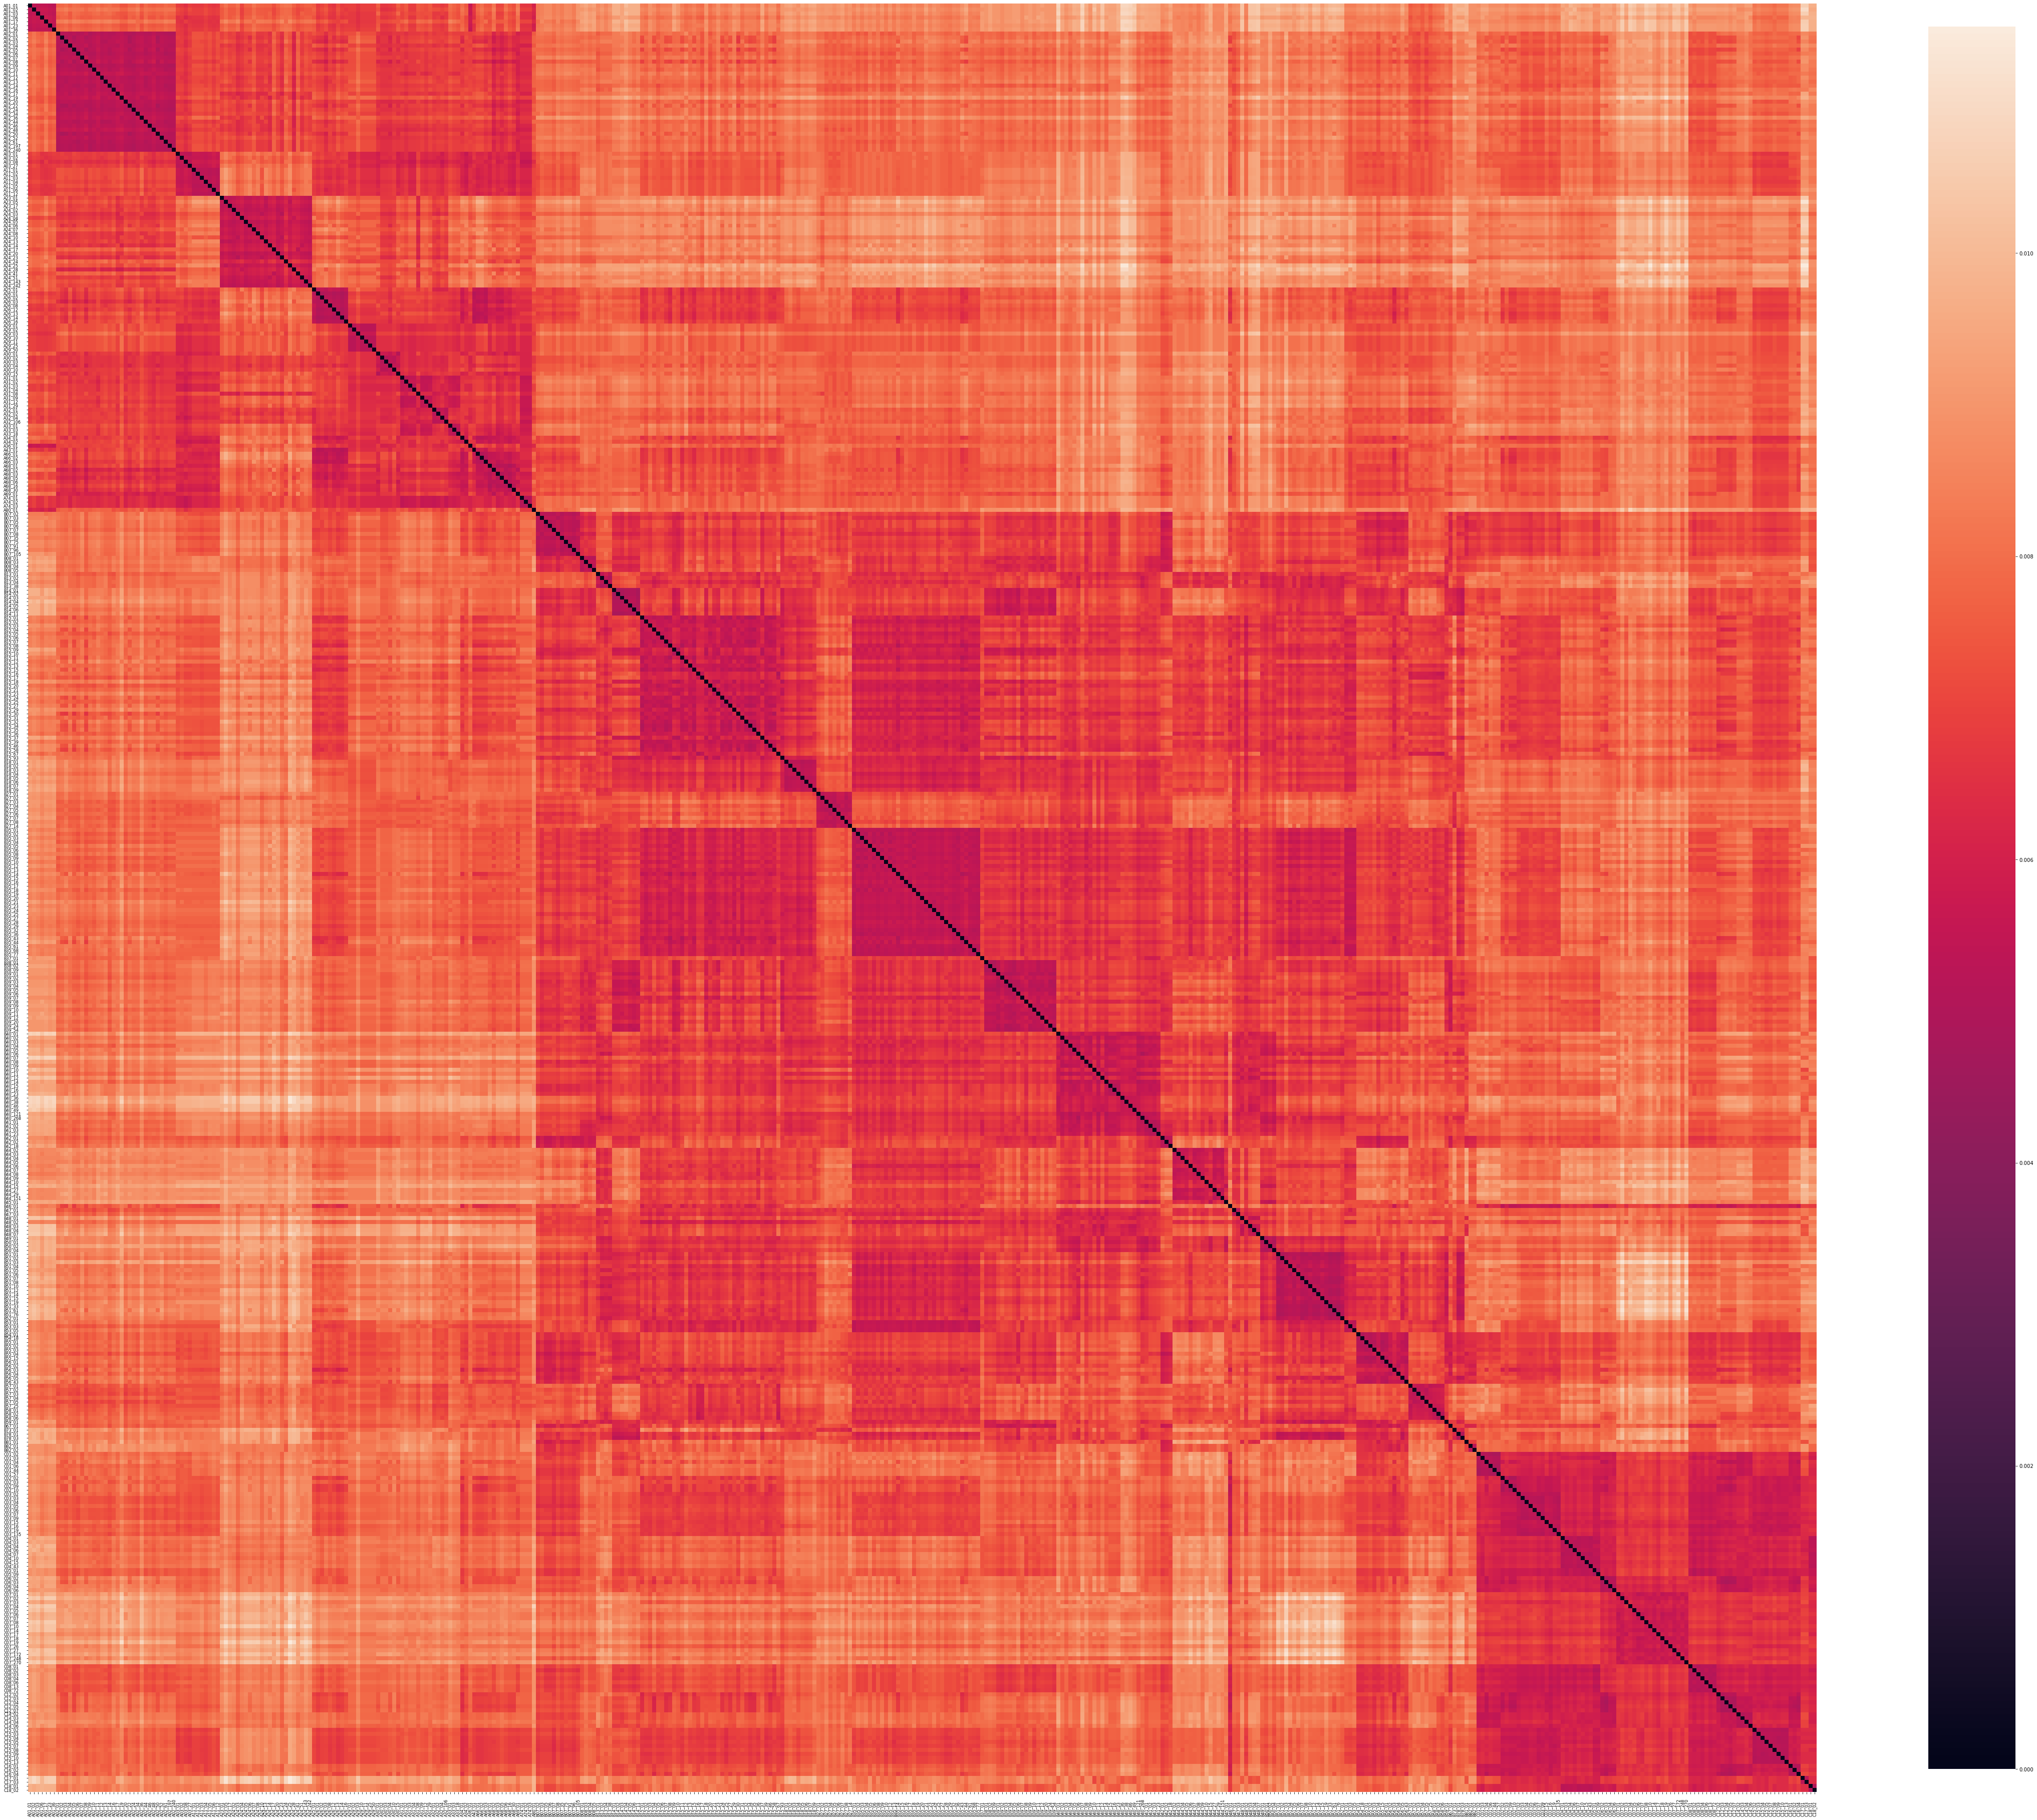

In [10]:
Mat = MSAMat("pop_HLA_pseudo.faa", 1)
heatmap(Mat, order=None, line=False, size=(80,80))
Matrix2Dendro(Mat, "HLA-I_pseudo.newick")